In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sma
import numpy as np

# Descriptive analysis

In [3]:
life_expectancy = pd.read_csv ("life_expectancy.csv")
life_expectancy = life_expectancy.drop (life_expectancy.columns[[0,1,2,3,4,6,9,10,11,15,16,17,18,19,20,21,22,24,25,26]],axis = 1)
life_expectancy ['Time period Sortable'] = pd.to_datetime(life_expectancy['Time period Sortable'].astype(str).str[:4],format='%Y').dt.year


## I need yearly data so from line 9346 in csv --> -2 for indext plus counting from 0
life_expectancy = life_expectancy[9344:]
life_expectancy

## separeting each gender and place 

## gender
life_expectancy_M = life_expectancy[life_expectancy["Sex"]== "Male"]
life_expectancy_F = life_expectancy[life_expectancy["Sex"]== "Female"]

## for England data 
life_expectancy_england_M = life_expectancy_M[life_expectancy_M["Area Name"]== "England"]
life_expectancy_england_F = life_expectancy_F[life_expectancy_F["Area Name"]== "England"]

## need not compared data for england
life_expectancy_england_M = life_expectancy_england_M[0::2]
life_expectancy_england_F = life_expectancy_england_F[0::2]

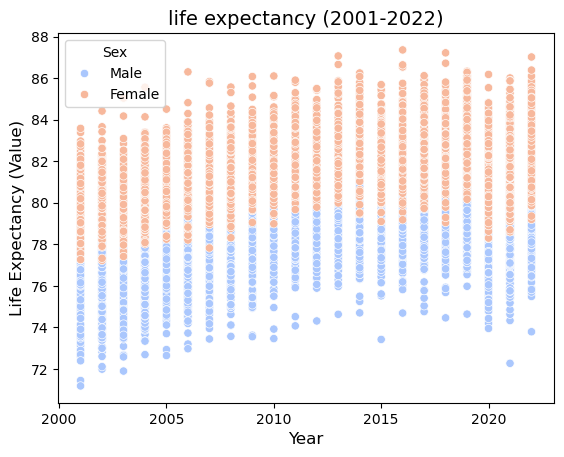

In [4]:
## scatter plot for the year 

sns.scatterplot(
    x=life_expectancy['Time period Sortable'],
    y=life_expectancy['Value'],
    hue=life_expectancy['Sex'], 
    palette='coolwarm', 
    data=life_expectancy
)


plt.xlabel('Year', fontsize=12)
plt.ylabel('Life Expectancy (Value)', fontsize=12)
plt.title('life expectancy (2001-2022)', fontsize=14)

plt.show()

# Regioonal data

In [6]:
regional_life_expectancy = pd.read_csv("life_expectancy-Regionsstatistical.data.csv")
## get tomedate
regional_life_expectancy['Time period Sortable'] = pd.to_datetime(regional_life_expectancy['Time period Sortable'].astype(str).str[:4],format='%Y').dt.year

## drop unnnesessary columns 
regional_life_expectancy = regional_life_expectancy.drop(regional_life_expectancy.columns[[0,1,2,3,4,6,9,10,11,15,16,17,18,19,20,21,22,24,25,26]],axis = 1)

## get 1 yr data 
regional_life_expectancy = regional_life_expectancy[1020:]

## checking NaN data
print (regional_life_expectancy.isnull().sum())

region = list(set(regional_life_expectancy['Area Name']))
region

## Male and Female
region_life_expectancy_M = regional_life_expectancy[regional_life_expectancy["Sex"]== "Male"]
region_life_expectancy_F = regional_life_expectancy[regional_life_expectancy["Sex"]== "Female"]



## splitting by region and Gender 

##'North East region (statistical) == NE
life_expectancy_NE_M = region_life_expectancy_M[region_life_expectancy_M["Area Name"]== 'North East region (statistical)']
life_expectancy_NE_F = region_life_expectancy_F[region_life_expectancy_F["Area Name"]== 'North East region (statistical)']

## 'West Midlands region (statistical)' == WM
life_expectancy_WM_M = region_life_expectancy_M[region_life_expectancy_M["Area Name"]== 'West Midlands region (statistical)']
life_expectancy_WM_F = region_life_expectancy_F[region_life_expectancy_F["Area Name"]== 'West Midlands region (statistical)']

## 'South East region (statistical)' == SE
life_expectancy_SE_M = region_life_expectancy_M[region_life_expectancy_M["Area Name"]== 'South East region (statistical)']
life_expectancy_SE_F = region_life_expectancy_F[region_life_expectancy_F["Area Name"]== 'South East region (statistical)']

## 'North West region (statistical)' == NW
life_expectancy_NW_M = region_life_expectancy_M[region_life_expectancy_M["Area Name"]== 'North West region (statistical)']
life_expectancy_NW_F = region_life_expectancy_F[region_life_expectancy_F["Area Name"]== 'North West region (statistical)']

## 'East Midlands region (statistical)' == EM
life_expectancy_EM_M = region_life_expectancy_M[region_life_expectancy_M["Area Name"]== 'East Midlands region (statistical)']
life_expectancy_EM_F = region_life_expectancy_F[region_life_expectancy_F["Area Name"]== 'East Midlands region (statistical)']

## 'East of England region (statistical)' == EoE
life_expectancy_EoE_M = region_life_expectancy_M[region_life_expectancy_M["Area Name"]== 'East of England region (statistical)']
life_expectancy_EoE_F = region_life_expectancy_F[region_life_expectancy_F["Area Name"]== 'East of England region (statistical)']

##'South West region (statistical)' == SW
life_expectancy_SW_M = region_life_expectancy_M[region_life_expectancy_M["Area Name"]== 'South West region (statistical)']
life_expectancy_SW_F = region_life_expectancy_F[region_life_expectancy_F["Area Name"]== 'South West region (statistical)']

## 'London region (statistical)' == London
life_expectancy_London_M = region_life_expectancy_M[region_life_expectancy_M["Area Name"]== 'London region (statistical)']
life_expectancy_London_F = region_life_expectancy_F[region_life_expectancy_F["Area Name"]== 'London region (statistical)']

## 'Yorkshire and the Humber region (statistical)' == YaH
life_expectancy_YaH_M = region_life_expectancy_M[region_life_expectancy_M["Area Name"]== 'Yorkshire and the Humber region (statistical)']
life_expectancy_YaH_F = region_life_expectancy_F[region_life_expectancy_F["Area Name"]== 'Yorkshire and the Humber region (statistical)']

## England average 
life_expectancy_England_region_M = region_life_expectancy_M[region_life_expectancy_M["Area Name"]== 'England']
life_expectancy_England_region_F = region_life_expectancy_F[region_life_expectancy_F["Area Name"]== 'England']

## not compared data only
life_expectancy_England_region_M = life_expectancy_England_region_M[0::2]
life_expectancy_England_region_F = life_expectancy_England_region_F[0::2]


Area Name               0
Sex                     0
Age                     0
Value                   0
Lower CI 95.0 limit     0
Upper CI 95.0 limit     0
Time period Sortable    0
dtype: int64


#  plotting regional life expectancy

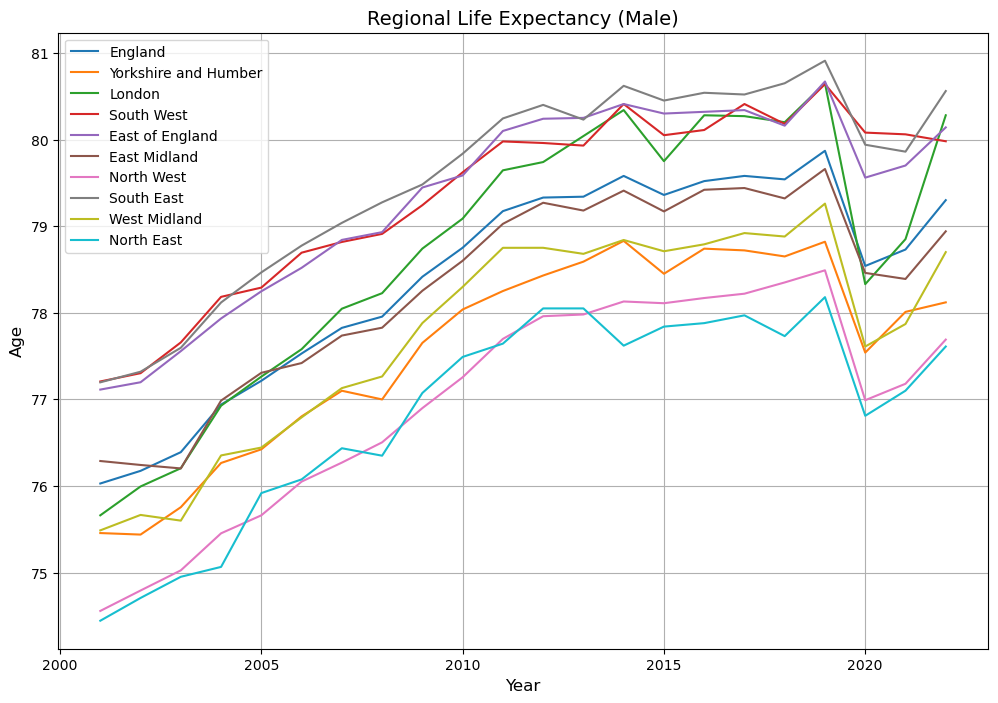

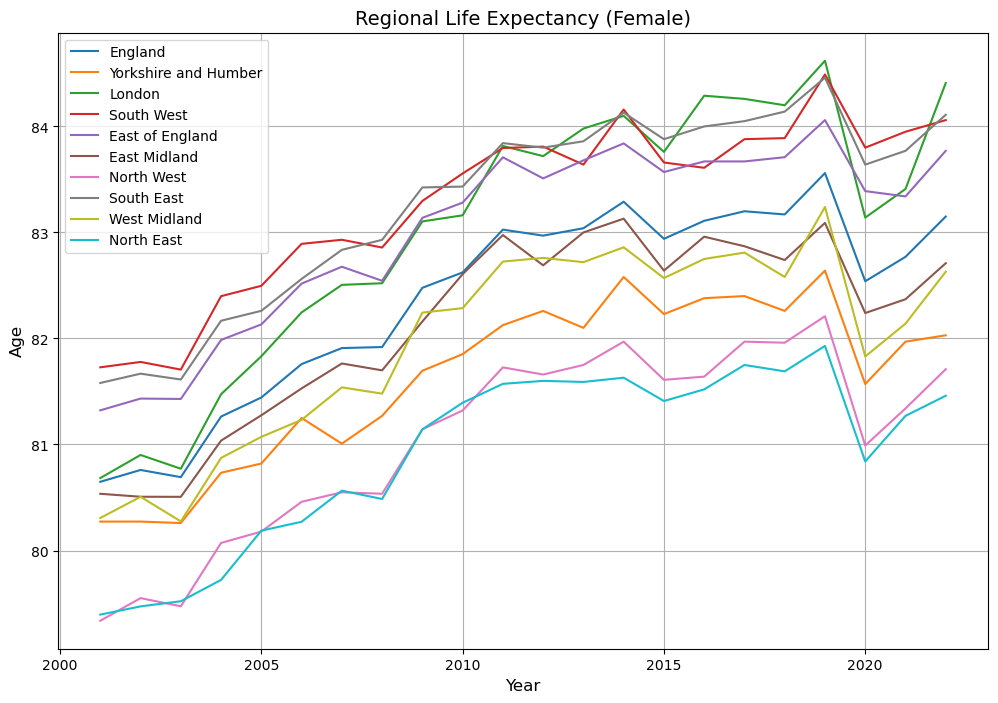

In [8]:
## plotting regional life expectancy

## Male
merged_df_M_regional = pd.merge(
    life_expectancy_England_region_M[['Time period Sortable', 'Value']],
    life_expectancy_YaH_M[['Time period Sortable', 'Value']],
    on='Time period Sortable', suffixes=('_england_M', '_YaH_M') 
)
merged_df_M_regional = pd.merge(
    merged_df_M_regional, life_expectancy_London_M[['Time period Sortable', 'Value']],
    on="Time period Sortable", suffixes=('_merged1', '_London_M')  
)
merged_df_M_regional = pd.merge(
    merged_df_M_regional, life_expectancy_SW_M[['Time period Sortable', 'Value']], 
    on="Time period Sortable", suffixes=('_London_M','_SW_M')
)
merged_df_M_regional = pd.merge(
    merged_df_M_regional, life_expectancy_EoE_M[['Time period Sortable', 'Value']], 
    on="Time period Sortable", suffixes=('_mergend3','_EoE_M')
)
merged_df_M_regional = pd.merge(
    merged_df_M_regional, life_expectancy_EM_M[['Time period Sortable', 'Value']], 
    on="Time period Sortable", suffixes=('_EoE_M','_EM_M')
)
merged_df_M_regional = pd.merge(
    merged_df_M_regional, life_expectancy_NW_M[['Time period Sortable', 'Value']], 
    on="Time period Sortable", suffixes=('_mergend5','_NW_M')
)
merged_df_M_regional = pd.merge(
    merged_df_M_regional, life_expectancy_SE_M[['Time period Sortable', 'Value']], 
    on="Time period Sortable", suffixes=('_NW_M','_SE_M')
)
merged_df_M_regional = pd.merge(
    merged_df_M_regional, life_expectancy_WM_M[['Time period Sortable', 'Value']], 
    on="Time period Sortable", suffixes=('_mergend7','_WM_M')
)
merged_df_M_regional = pd.merge(
    merged_df_M_regional, life_expectancy_NE_M[['Time period Sortable', 'Value']], 
    on="Time period Sortable", suffixes=('_WM_M','_NE_M')
)

merged_df_M_regional.columns

plt.figure(figsize=(12, 8))
for col in ['Value_england_M', 'Value_YaH_M',
       'Value_London_M', 'Value_SW_M', 'Value_EoE_M', 'Value_EM_M', 'Value_NW_M',
       'Value_SE_M', 'Value_WM_M', 'Value_NE_M']:
    plt.plot(merged_df_M_regional['Time period Sortable'], merged_df_M_regional[col], label=col)

plt.title('Regional Life Expectancy (Male)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.legend(["England","Yorkshire and Humber","London","South West","East of England",
            "East Midland","North West","South East","West Midland","North East"])
plt.grid(True)
plt.show()

## Female
merged_df_F_regional = pd.merge(
    life_expectancy_England_region_F[['Time period Sortable', 'Value']],
    life_expectancy_YaH_F[['Time period Sortable', 'Value']],
    on='Time period Sortable', suffixes=('_england_F', '_YaH_F') 
)
merged_df_F_regional = pd.merge(
    merged_df_F_regional, life_expectancy_London_F[['Time period Sortable', 'Value']],
    on="Time period Sortable", suffixes=('_merged1', '_London_F')  
)
merged_df_F_regional = pd.merge(
    merged_df_F_regional, life_expectancy_SW_F[['Time period Sortable', 'Value']], 
    on="Time period Sortable", suffixes=('_London_F','_SW_F') 
)
merged_df_F_regional = pd.merge(
    merged_df_F_regional, life_expectancy_EoE_F[['Time period Sortable', 'Value']], 
    on="Time period Sortable", suffixes=('_mergend3','_EoE_F')
)
merged_df_F_regional = pd.merge(
    merged_df_F_regional, life_expectancy_EM_F[['Time period Sortable', 'Value']], 
    on="Time period Sortable", suffixes=('_EoE_F','_EM_F')
)
merged_df_F_regional = pd.merge(
    merged_df_F_regional, life_expectancy_NW_F[['Time period Sortable', 'Value']], 
    on="Time period Sortable", suffixes=('_mergend5','_NW_F')
)
merged_df_F_regional = pd.merge(
    merged_df_F_regional, life_expectancy_SE_F[['Time period Sortable', 'Value']], 
    on="Time period Sortable", suffixes=('_NW_F','_SE_F')
)
merged_df_F_regional = pd.merge(
    merged_df_F_regional, life_expectancy_WM_F[['Time period Sortable', 'Value']], 
    on="Time period Sortable", suffixes=('_mergend7','_WM_F')
)
merged_df_F_regional = pd.merge(
    merged_df_F_regional, life_expectancy_NE_F[['Time period Sortable', 'Value']], 
    on="Time period Sortable", suffixes=('_WM_F','_NE_F')
)

merged_df_F_regional.columns

plt.figure(figsize=(12, 8))
for col in ['Value_england_F', 'Value_YaH_F',
       'Value_London_F', 'Value_SW_F', 'Value_EoE_F', 'Value_EM_F',
       'Value_NW_F', 'Value_SE_F', 'Value_WM_F', 'Value_NE_F']:
    plt.plot(merged_df_M_regional['Time period Sortable'], merged_df_F_regional[col], label=col)

plt.title('Regional Life Expectancy (Female)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.legend(["England","Yorkshire and Humber","London","South West","East of England",
            "East Midland","North West","South East","West Midland","North East"])
plt.grid(True)
plt.show()

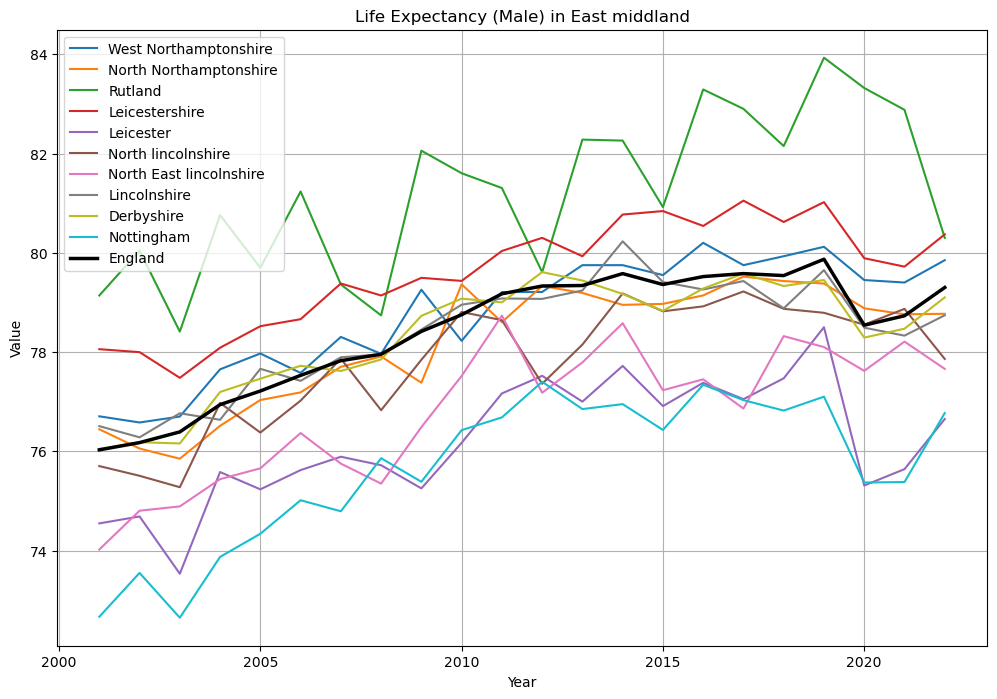

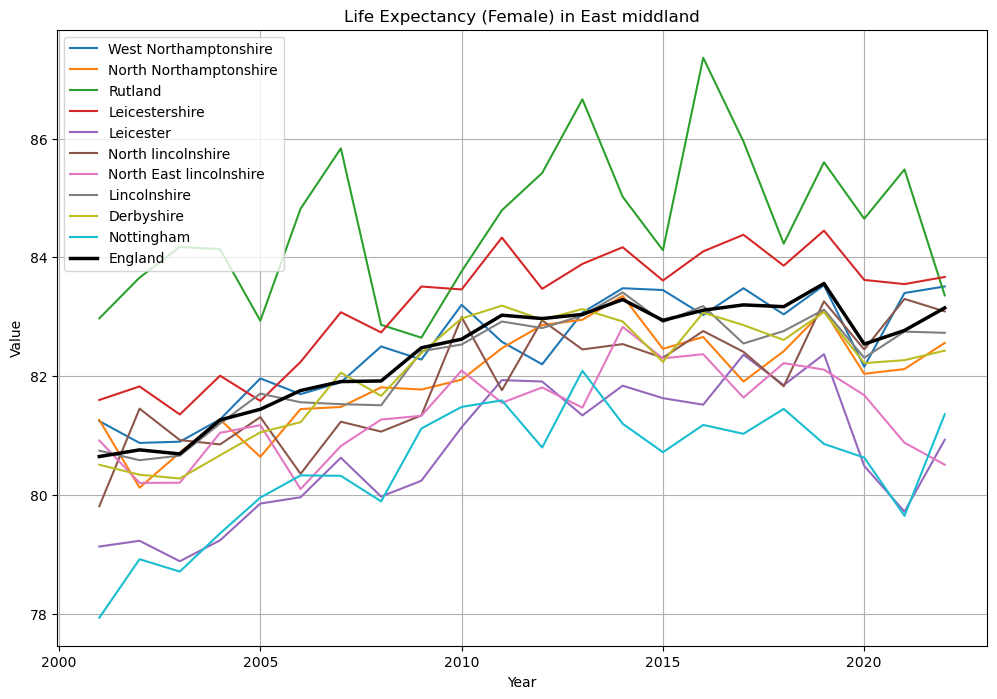

In [9]:
## england East midland 


# Derbyshire
life_expectancy_derbyshire_F = pd.read_csv('life_expectancy_Derbyshire_Female.csv')
life_expectancy_derbyshire_M = pd.read_csv('life_expectancy_Derbyshire_Male.csv')

# Nottingham
life_expectancy_nottingham_M = pd.read_csv('life_expectancy_Nottingham_Male.csv')
life_expectancy_nottingham_F = pd.read_csv('life_expectancy_Nottingham_Female.csv')


# Lincolnshire
life_expectancy_lincolnshire_F = pd.read_csv ('life_expectancy_Lincolnshire_Female.csv')
life_expectancy_lincolnshire_M = pd.read_csv ('life_expectancy_Lincolnshire_Male.csv')

# North East lincolnshire
life_expectancy_NE_lincolnshire_F = pd.read_csv ('life_expectancy_North East Lincolnshire_Female.csv')
life_expectancy_NE_lincolnshire_M = pd.read_csv ('life_expectancy_North East Lincolnshire_Male.csv')

# North lincolnshire
life_expectancy_N_lincolnshire_F = pd.read_csv ('life_expectancy_North Lincolnshire_Female.csv')
life_expectancy_N_lincolnshire_M = pd.read_csv ('life_expectancy_North Lincolnshire_Male.csv')

# Leicester
life_expectancy_leicester_F = pd.read_csv('life_expectancy_Leicester_Female.csv')
life_expectancy_leicester_M = pd.read_csv('life_expectancy_Leicester_Male.csv')

# Leicestershire
life_expectancy_Leicestershire_F = pd.read_csv('life_expectancy_Leicestershire_Female.csv')
life_expectancy_Leicestershire_M = pd.read_csv('life_expectancy_Leicestershire_Male.csv')

# Rutland
life_expectancy_Rutland_F = pd.read_csv('life_expectancy_Rutland_Female.csv')
life_expectancy_Rutland_M = pd.read_csv('life_expectancy_Rutland_Male.csv')

# North Northamptonshire
life_expectancy_N_Northamptonshire_F = pd.read_csv('life_expectancy_North Northamptonshire_Female.csv')
life_expectancy_N_Northamptonshire_M = pd.read_csv('life_expectancy_North Northamptonshire_Male.csv')

# West Northamptonshire
life_expectancy_W_Northamptonshire_F = pd.read_csv('life_expectancy_West Northamptonshire_Female.csv')
life_expectancy_W_Northamptonshire_M = pd.read_csv('life_expectancy_West Northamptonshire_Male.csv')

### plotting 

East_midland = [life_expectancy_W_Northamptonshire_M,life_expectancy_N_Northamptonshire_M,life_expectancy_Rutland_M,
               life_expectancy_Leicestershire_M,life_expectancy_leicester_M,life_expectancy_N_lincolnshire_M,
               life_expectancy_NE_lincolnshire_M,life_expectancy_lincolnshire_M,life_expectancy_derbyshire_M,life_expectancy_nottingham_M,
               life_expectancy_england_M]

EMlabels = ["West Northamptonshire","North Northamptonshire","Rutland","Leicestershire","Leicester",
           "North lincolnshire","North East lincolnshire","Lincolnshire","Derbyshire","Nottingham","England"]


plt.figure(figsize=(12, 8))
for i, df in enumerate(East_midland):
    if EMlabels[i] == "England":
        plt.plot(df["Time period Sortable"], df["Value"], label=EMlabels[i], color="black", linewidth=2.5)
    else:
        plt.plot(df["Time period Sortable"], df["Value"], label=EMlabels[i])


plt.title("Life Expectancy (Male) in East middland")
plt.xlabel("Year")
plt.ylabel("Value")
plt.legend()  
plt.grid(True)
plt.show()



East_midland2 = [life_expectancy_W_Northamptonshire_F,life_expectancy_N_Northamptonshire_F,life_expectancy_Rutland_F,
               life_expectancy_Leicestershire_F,life_expectancy_leicester_F,life_expectancy_N_lincolnshire_F,
               life_expectancy_NE_lincolnshire_F,life_expectancy_lincolnshire_F,life_expectancy_derbyshire_F,life_expectancy_nottingham_F,
               life_expectancy_england_F]

EMlabels2 = ["West Northamptonshire","North Northamptonshire","Rutland","Leicestershire","Leicester",
           "North lincolnshire","North East lincolnshire","Lincolnshire","Derbyshire","Nottingham","England"]


plt.figure(figsize=(12, 8))
for i, df in enumerate(East_midland2):
    if EMlabels2[i] == "England":
        plt.plot(df["Time period Sortable"], df["Value"], label=EMlabels2[i], color="black", linewidth=2.5)
    else:
        plt.plot(df["Time period Sortable"], df["Value"], label=EMlabels2[i])


plt.title("Life Expectancy (Female) in East middland")
plt.xlabel("Year")
plt.ylabel("Value")
plt.legend()  
plt.grid(True)
plt.show()

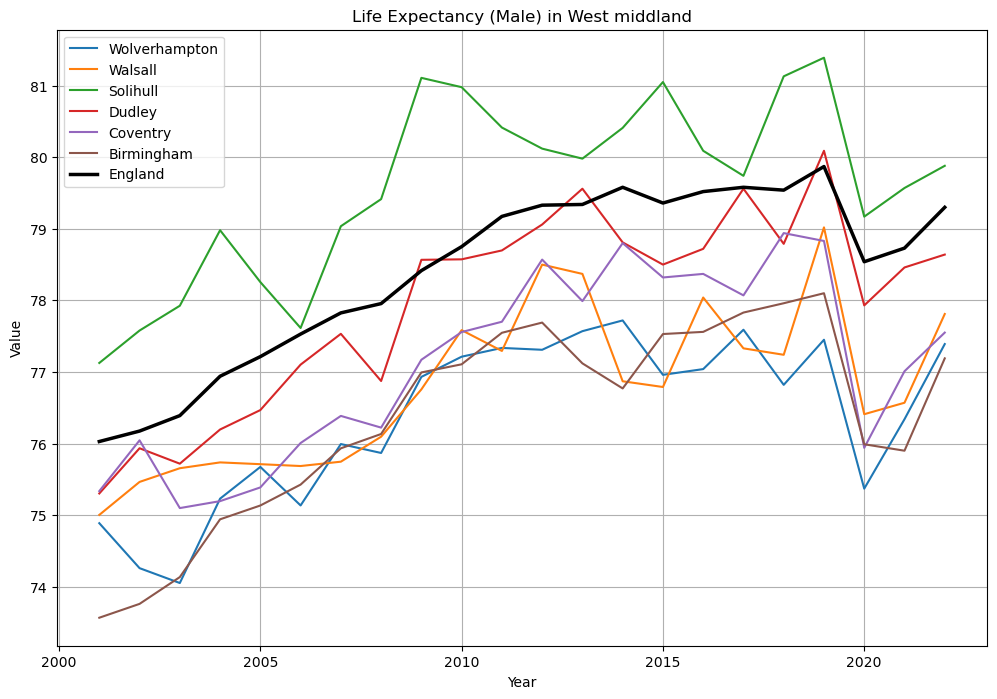

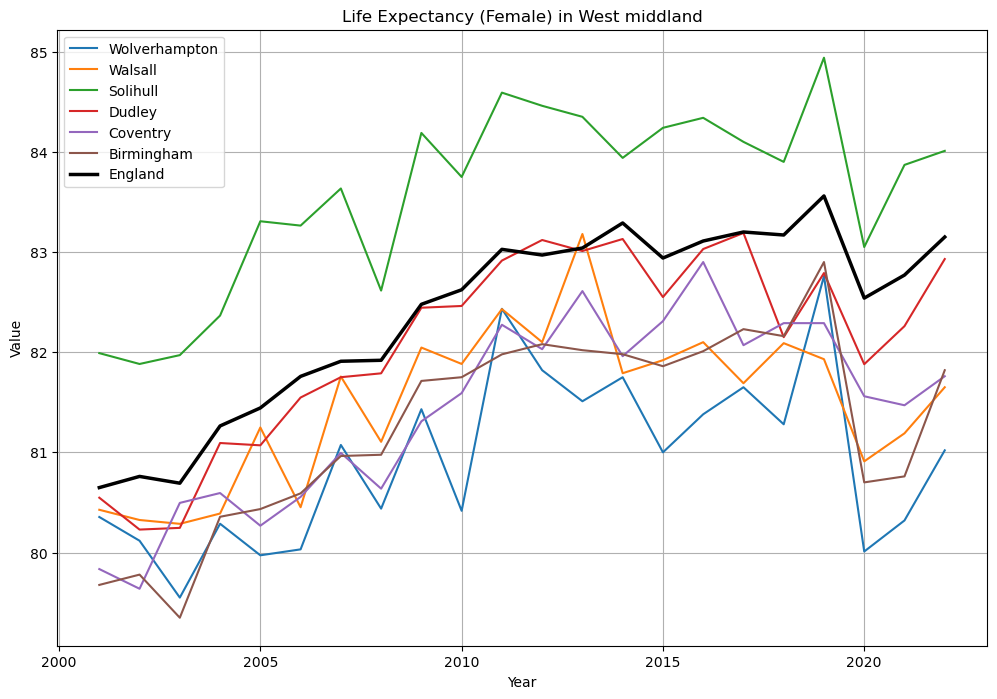

In [10]:
## WEst midland

## Birmingham
life_expectancy_birmingham_M = life_expectancy_M[life_expectancy_M["Area Name"]== "Birmingham"]
life_expectancy_birmingham_F = life_expectancy_F[life_expectancy_F["Area Name"]== "Birmingham"]

# Coventry
life_expectancy_Coventry_F = pd.read_csv('life_expectancy_Coventry_Female.csv')
life_expectancy_Coventry_M = pd.read_csv('life_expectancy_Coventry_Male.csv')

# Dudley
life_expectancy_Dudley_F = pd.read_csv('life_expectancy_Dudley_Female.csv')
life_expectancy_Dudley_M = pd.read_csv('life_expectancy_Dudley_Male.csv')

# Solihull
life_expectancy_Solihull_F = pd.read_csv('life_expectancy_Solihull_Female.csv')
life_expectancy_Solihull_M = pd.read_csv('life_expectancy_Solihull_Male.csv')

# Walsall
life_expectancy_Walsall_F = pd.read_csv('life_expectancy_Walsall_Female.csv')
life_expectancy_Walsall_M = pd.read_csv('life_expectancy_Walsall_Male.csv')

# Wolverhampton
life_expectancy_Wolverhampton_F = pd.read_csv('life_expectancy_Wolverhampton_Female.csv')
life_expectancy_Wolverhampton_M = pd.read_csv('life_expectancy_Wolverhampton_Male.csv')



### plotting 

West_midland2 = [life_expectancy_Wolverhampton_M,life_expectancy_Walsall_M,
               life_expectancy_Solihull_M,life_expectancy_Dudley_M,life_expectancy_Coventry_M,
               life_expectancy_birmingham_M, life_expectancy_england_M]

WMlabels2 = ["Wolverhampton","Walsall","Solihull","Dudley","Coventry","Birmingham","England"]


plt.figure(figsize=(12, 8))
for i, df in enumerate(West_midland2):
    if WMlabels2[i] == "England":
        plt.plot(df["Time period Sortable"], df["Value"], label=WMlabels2[i], color="black", linewidth=2.5)
    else:
        plt.plot(df["Time period Sortable"], df["Value"], label=WMlabels2[i])


plt.title("Life Expectancy (Male) in West middland")
plt.xlabel("Year")
plt.ylabel("Value")
plt.legend()  
plt.grid(True)
plt.show()


West_midland = [life_expectancy_Wolverhampton_F,life_expectancy_Walsall_F,
               life_expectancy_Solihull_F,life_expectancy_Dudley_F,life_expectancy_Coventry_F,
               life_expectancy_birmingham_F, life_expectancy_england_F]

WMlabels = ["Wolverhampton","Walsall","Solihull","Dudley","Coventry","Birmingham","England"]


plt.figure(figsize=(12, 8))
for i, df in enumerate(West_midland):
    if WMlabels[i] == "England":
        plt.plot(df["Time period Sortable"], df["Value"], label=WMlabels[i], color="black", linewidth=2.5)
    else:
        plt.plot(df["Time period Sortable"], df["Value"], label=WMlabels2[i])


plt.title("Life Expectancy (Female) in West middland")
plt.xlabel("Year")
plt.ylabel("Value")
plt.legend()  
plt.grid(True)
plt.show()

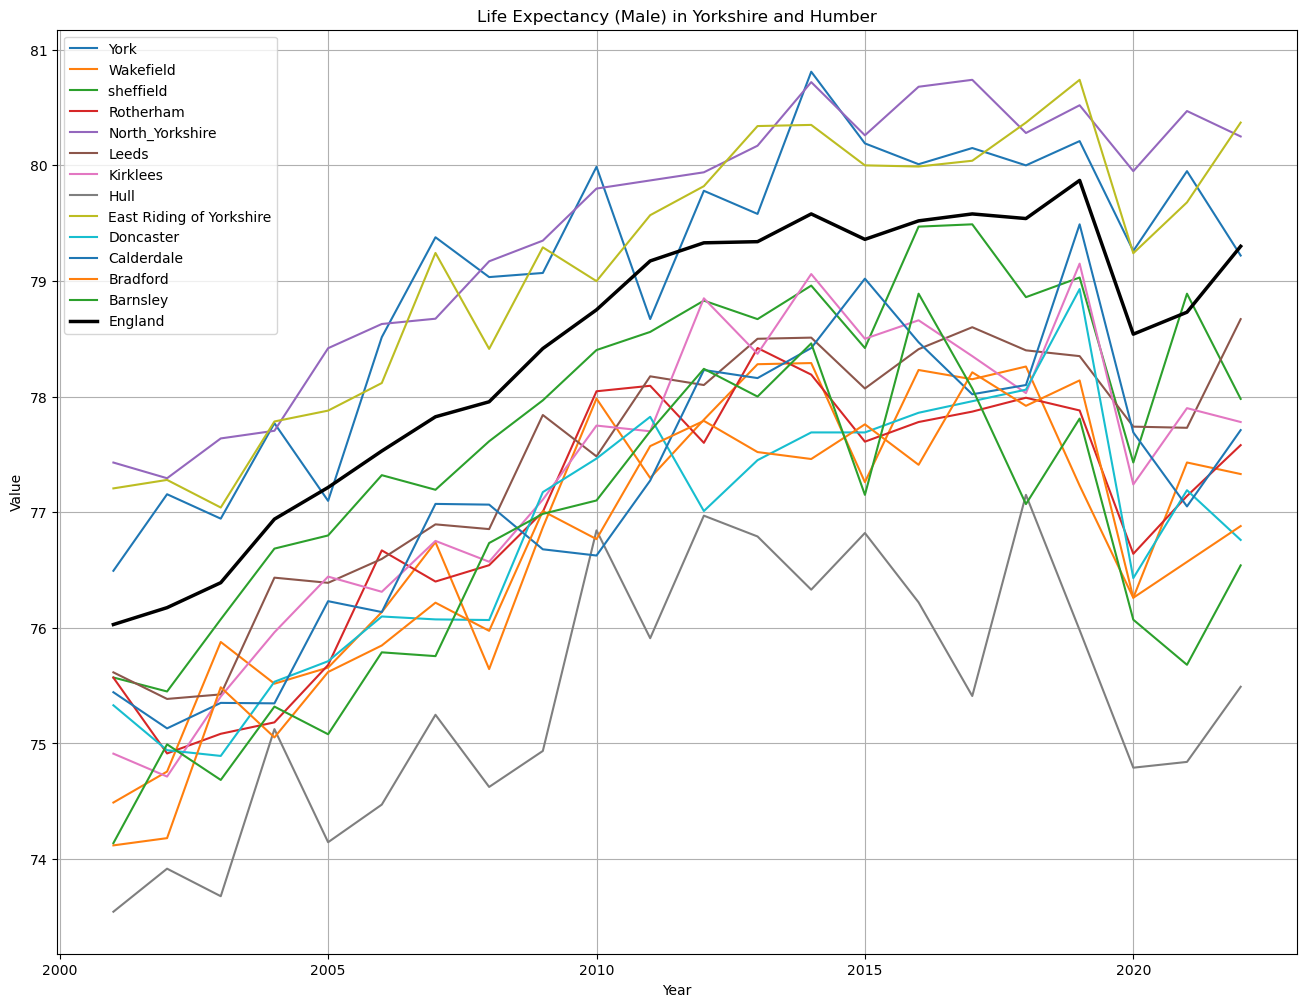

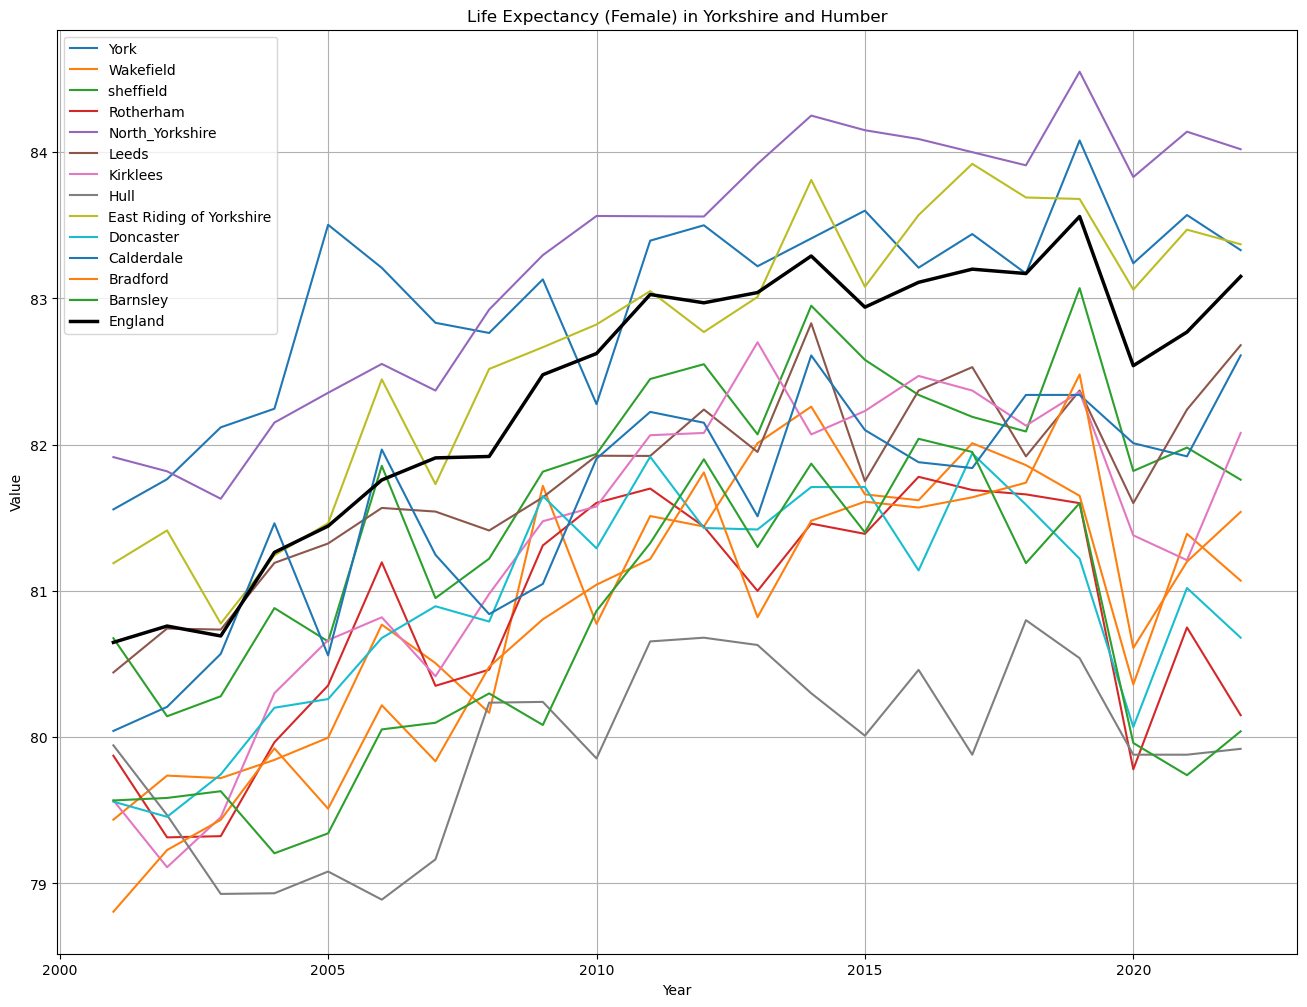

In [11]:
### Yorkshire and Humber

# Barnsley
life_expectancy_Barnsley_F = pd.read_csv('life_expectancy_Barnsley_Female.csv')
life_expectancy_Barnsley_M = pd.read_csv('life_expectancy_Barnsley_Male.csv')

# Bradford
life_expectancy_Bradford_F = pd.read_csv('life_expectancy_Bradford_Female.csv')
life_expectancy_Bradford_M = pd.read_csv('life_expectancy_Bradford_Male.csv')

# Calderdale
life_expectancy_Calderdale_F = pd.read_csv('life_expectancy_Calderdale_Female.csv')
life_expectancy_Calderdale_M = pd.read_csv('life_expectancy_Calderdale_Male.csv')

# Doncaster
life_expectancy_Doncaster_F = pd.read_csv('life_expectancy_Doncaster_Female.csv')
life_expectancy_Doncaster_M = pd.read_csv('life_expectancy_Doncaster_Male.csv')

# East Riding of Yorkshire
life_expectancy_East_Riding_of_Yorkshire_F = pd.read_csv('life_expectancy_East Riding of Yorkshire_Female.csv')
life_expectancy_East_Riding_of_Yorkshire_M = pd.read_csv('life_expectancy_East Riding of Yorkshire_Male.csv')

# Kingston upon Hull
life_expectancy_Hull_F = pd.read_csv('life_expectancy_Kingston upon Hull_Female.csv')
life_expectancy_Hull_M = pd.read_csv('life_expectancy_Kingston upon Hull_Male.csv')

# Kirkleesl
life_expectancy_Kirklees_F = pd.read_csv('life_expectancy_Kirklees_Female.csv')
life_expectancy_Kirklees_M = pd.read_csv('life_expectancy_Kirklees_Male.csv')

# Leeds
life_expectancy_Leeds_F = pd.read_csv('life_expectancy_Leeds_Female.csv')
life_expectancy_Leeds_M = pd.read_csv('life_expectancy_Leeds_Male.csv')

# North_Yorkshire
life_expectancy_North_Yorkshire_F = pd.read_csv('life_expectancy_North Yorkshire UA_Female.csv')
life_expectancy_North_Yorkshire_M = pd.read_csv('life_expectancy_North Yorkshire UA_Male.csv')

# Rotherham
life_expectancy_North_Rotherham_F = pd.read_csv('life_expectancy_Rotherham_Female.csv')
life_expectancy_North_Rotherham_M = pd.read_csv('life_expectancy_Rotherham_Male.csv')

## Sheffiled
life_expectancy_sheffield_M = life_expectancy_M [life_expectancy_M["Area Name"]== "Sheffield"]
life_expectancy_sheffield_F = life_expectancy_F [life_expectancy_F["Area Name"]== "Sheffield"]

# Wakefield
life_expectancy_Wakefield_F = pd.read_csv('life_expectancy_Wakefield_Female.csv')
life_expectancy_Wakefield_M = pd.read_csv('life_expectancy_Wakefield_Male.csv')

# York
life_expectancy_York_F = pd.read_csv('life_expectancy_York_Female.csv')
life_expectancy_York_M = pd.read_csv('life_expectancy_York_Male.csv')



### plotting 

YorkaH = [life_expectancy_York_M,life_expectancy_Wakefield_M,life_expectancy_sheffield_M,life_expectancy_North_Rotherham_M,
         life_expectancy_North_Yorkshire_M,life_expectancy_Leeds_M,life_expectancy_Kirklees_M,life_expectancy_Hull_M,
         life_expectancy_East_Riding_of_Yorkshire_M,life_expectancy_Doncaster_M,life_expectancy_Calderdale_M,life_expectancy_Bradford_M,
         life_expectancy_Barnsley_M, life_expectancy_england_M]

Ylabels = ["York", "Wakefield","sheffield ","Rotherham","North_Yorkshire","Leeds","Kirklees","Hull",
          "East Riding of Yorkshire","Doncaster","Calderdale","Bradford","Barnsley","England"]


plt.figure(figsize=(16, 12))
for i, df in enumerate(YorkaH):
    if Ylabels[i] == "England":
        plt.plot(df["Time period Sortable"], df["Value"], label=Ylabels[i], color="black", linewidth=2.5)
    else:
        plt.plot(df["Time period Sortable"], df["Value"], label=Ylabels[i])


plt.title("Life Expectancy (Male) in Yorkshire and Humber")
plt.xlabel("Year")
plt.ylabel("Value")
plt.legend()  
plt.grid(True)
plt.show()


YorkaH2 = [life_expectancy_York_F,life_expectancy_Wakefield_F,life_expectancy_sheffield_F,life_expectancy_North_Rotherham_F,
         life_expectancy_North_Yorkshire_F,life_expectancy_Leeds_F,life_expectancy_Kirklees_F,life_expectancy_Hull_F,
         life_expectancy_East_Riding_of_Yorkshire_F,life_expectancy_Doncaster_F,life_expectancy_Calderdale_F,life_expectancy_Bradford_F,
         life_expectancy_Barnsley_F, life_expectancy_england_F]

Ylabels2 = ["York", "Wakefield","sheffield ","Rotherham","North_Yorkshire","Leeds","Kirklees","Hull",
          "East Riding of Yorkshire","Doncaster","Calderdale","Bradford","Barnsley","England"]


plt.figure(figsize=(16, 12))
for i, df in enumerate(YorkaH2):
    if Ylabels2[i] == "England":
        plt.plot(df["Time period Sortable"], df["Value"], label=Ylabels2[i], color="black", linewidth=2.5)
    else:
        plt.plot(df["Time period Sortable"], df["Value"], label=Ylabels2[i])


plt.title("Life Expectancy (Female) in Yorkshire and Humber")
plt.xlabel("Year")
plt.ylabel("Value")
plt.legend()  
plt.grid(True)
plt.show()

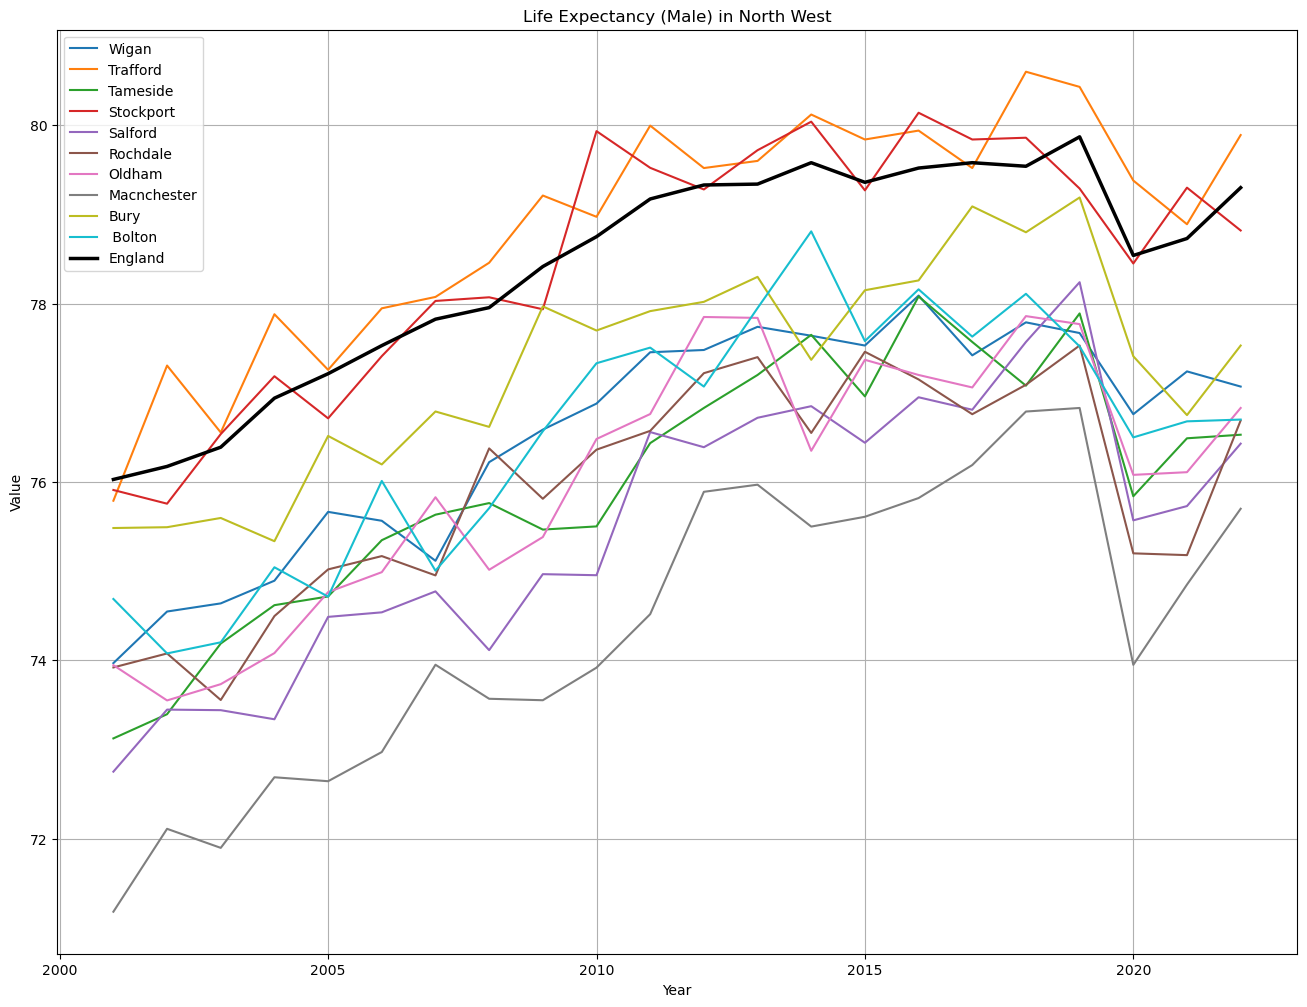

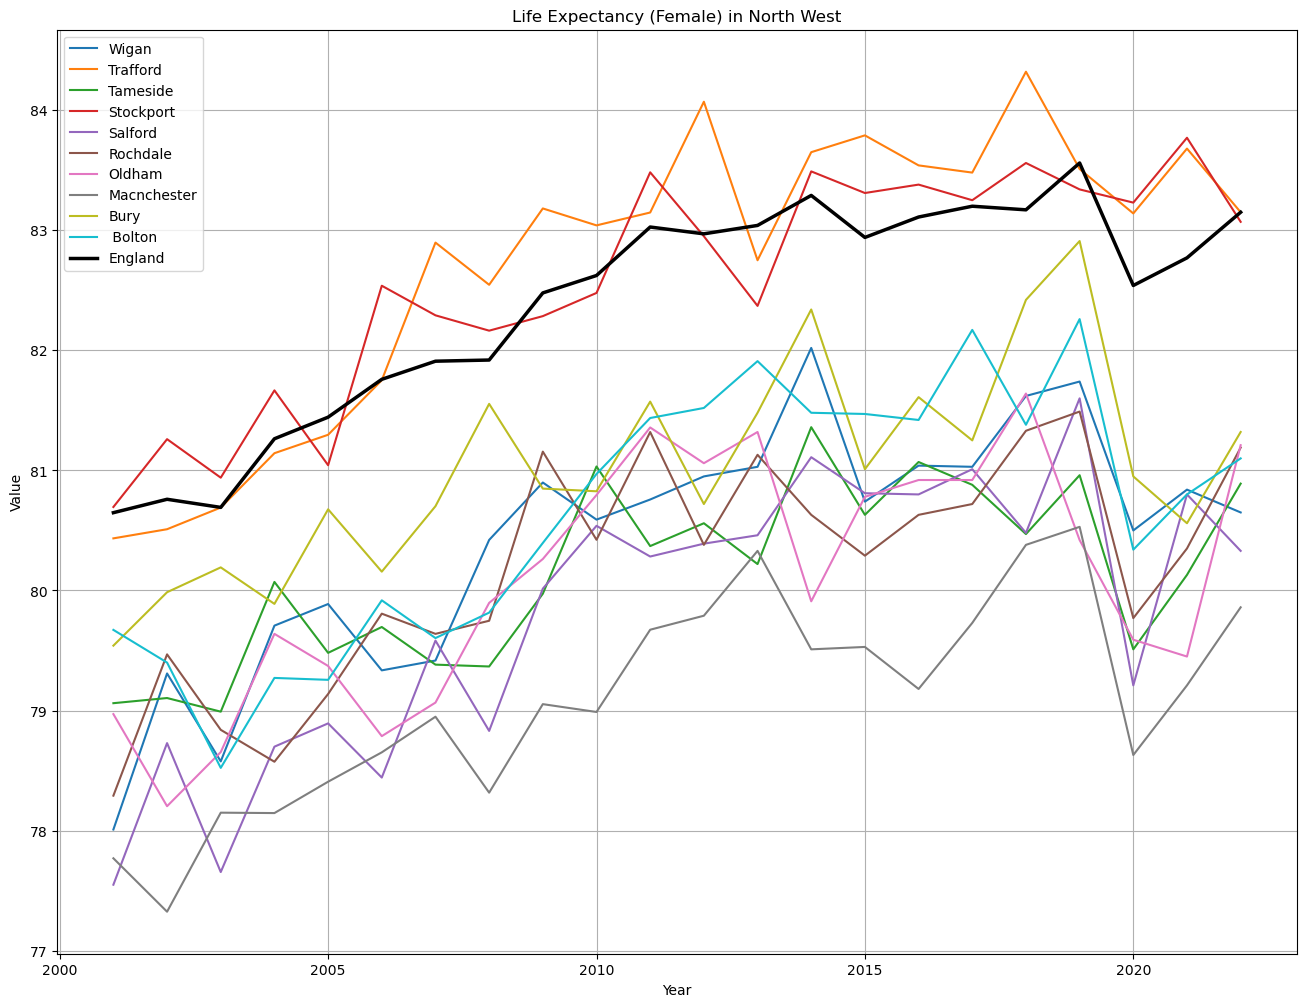

In [12]:
### North West and uk average 

# Bolton
life_expectancy_Bolton_F = pd.read_csv('life_expectancy_Bolton_Female.csv')
life_expectancy_Bolton_M = pd.read_csv('life_expectancy_Bolton_Male.csv')

# Bury
life_expectancy_Bury_F = pd.read_csv('life_expectancy_Bury_Female.csv')
life_expectancy_Bury_M = pd.read_csv('life_expectancy_Bury_Male.csv')

## Manchester
life_expectancy_manchester_M = life_expectancy_M [life_expectancy_M["Area Name"]== "Manchester"]
life_expectancy_manchester_F = life_expectancy_F [life_expectancy_F["Area Name"]== "Manchester"]

# Oldham
life_expectancy_Oldham_F = pd.read_csv('life_expectancy_Oldham_Female.csv')
life_expectancy_Oldham_M = pd.read_csv('life_expectancy_Oldham_Male.csv')

# Rochdale
life_expectancy_Rochdale_F = pd.read_csv('life_expectancy_Rochdale_Female.csv')
life_expectancy_Rochdale_M = pd.read_csv('life_expectancy_Rochdale_Male.csv')

# Salford
life_expectancy_Salford_F = pd.read_csv('life_expectancy_Salford_Female.csv')
life_expectancy_Salford_M = pd.read_csv('life_expectancy_Salford_Male.csv')

# Stockport
life_expectancy_Stockport_F = pd.read_csv('life_expectancy_Stockport_Female.csv')
life_expectancy_Stockport_M = pd.read_csv('life_expectancy_Stockport_Male.csv')

# Tameside
life_expectancy_Tameside_F = pd.read_csv('life_expectancy_Tameside_Female.csv')
life_expectancy_Tameside_M = pd.read_csv('life_expectancy_Tameside_Male.csv')


# Trafford
life_expectancy_Trafford_F = pd.read_csv('life_expectancy_Trafford_Female.csv')
life_expectancy_Trafford_M = pd.read_csv('life_expectancy_Trafford_Male.csv')


# Wigan
life_expectancy_Wigan_F = pd.read_csv('life_expectancy_Wigan_Female.csv')
life_expectancy_Wigan_M = pd.read_csv('life_expectancy_Wigan_Male.csv')



### plotting 

NW = [life_expectancy_Wigan_M,life_expectancy_Trafford_M,life_expectancy_Tameside_M,life_expectancy_Stockport_M,
     life_expectancy_Salford_M,life_expectancy_Rochdale_M,life_expectancy_Oldham_M,life_expectancy_manchester_M,
     life_expectancy_Bury_M,life_expectancy_Bolton_M,life_expectancy_england_M]

NWlabels = ["Wigan","Trafford","Tameside","Stockport","Salford","Rochdale","Oldham", "Macnchester",
           "Bury"," Bolton", "England"]


plt.figure(figsize=(16, 12))
for i, df in enumerate(NW):
    if NWlabels[i] == "England":
        plt.plot(df["Time period Sortable"], df["Value"], label=NWlabels[i], color="black", linewidth=2.5)
    else:
        plt.plot(df["Time period Sortable"], df["Value"], label=NWlabels[i])


plt.title("Life Expectancy (Male) in North West")
plt.xlabel("Year")
plt.ylabel("Value")
plt.legend()  
plt.grid(True)
plt.show()



NW2 = [life_expectancy_Wigan_F,life_expectancy_Trafford_F,life_expectancy_Tameside_F,life_expectancy_Stockport_F,
     life_expectancy_Salford_F,life_expectancy_Rochdale_F,life_expectancy_Oldham_F,life_expectancy_manchester_F,
     life_expectancy_Bury_F,life_expectancy_Bolton_F,life_expectancy_england_F]

NWlabels2 = ["Wigan","Trafford","Tameside","Stockport","Salford","Rochdale","Oldham", "Macnchester",
           "Bury"," Bolton", "England"]


plt.figure(figsize=(16, 12))
for i, df in enumerate(NW2):
    if NWlabels2[i] == "England":
        plt.plot(df["Time period Sortable"], df["Value"], label=NWlabels2[i], color="black", linewidth=2.5)
    else:
        plt.plot(df["Time period Sortable"], df["Value"], label=NWlabels2[i])


plt.title("Life Expectancy (Female) in North West")
plt.xlabel("Year")
plt.ylabel("Value")
plt.legend()  
plt.grid(True)
plt.show()

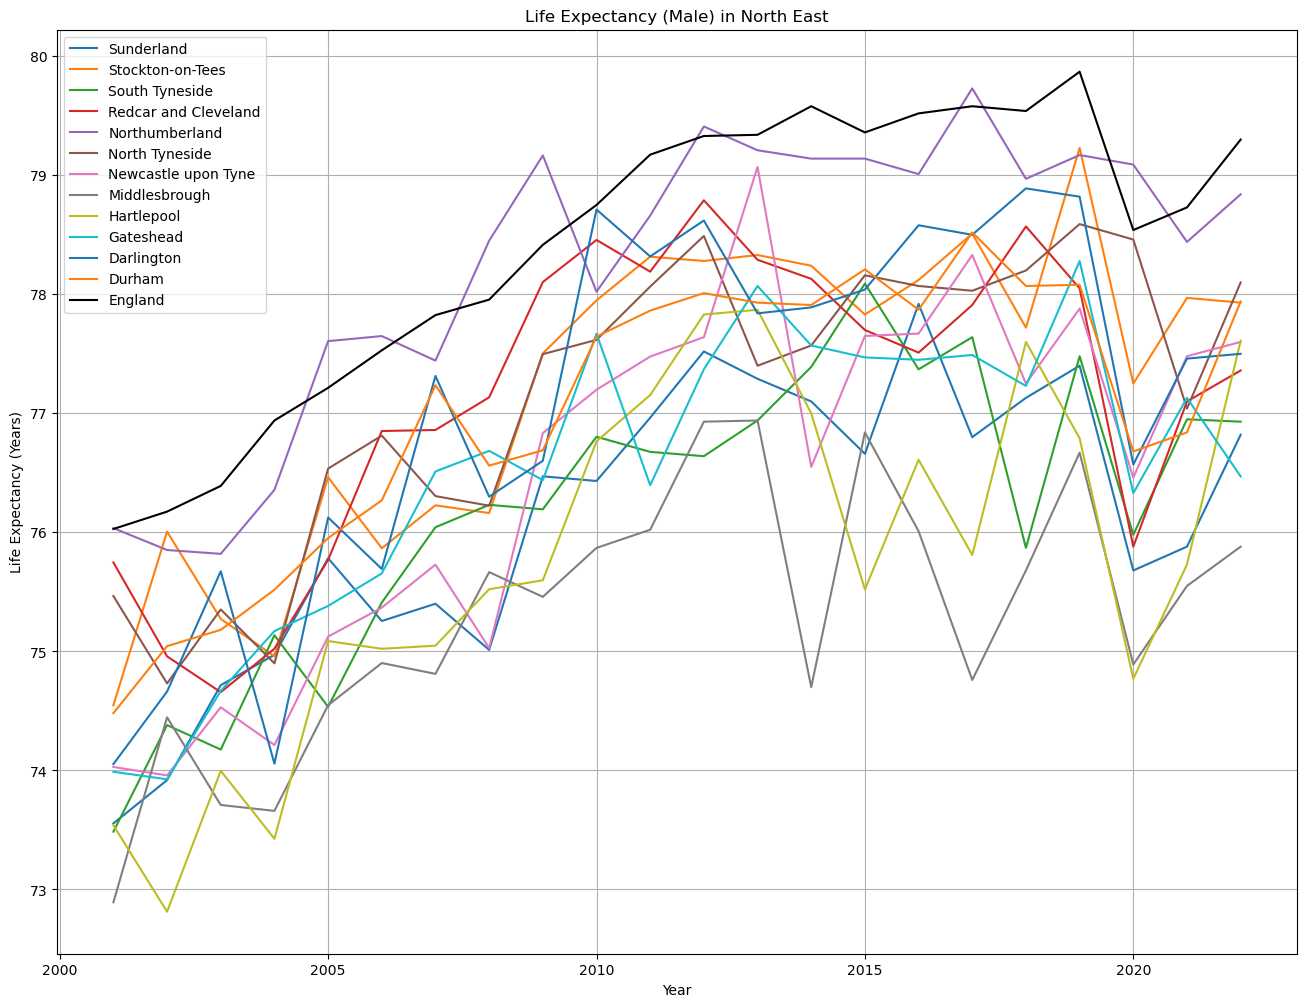

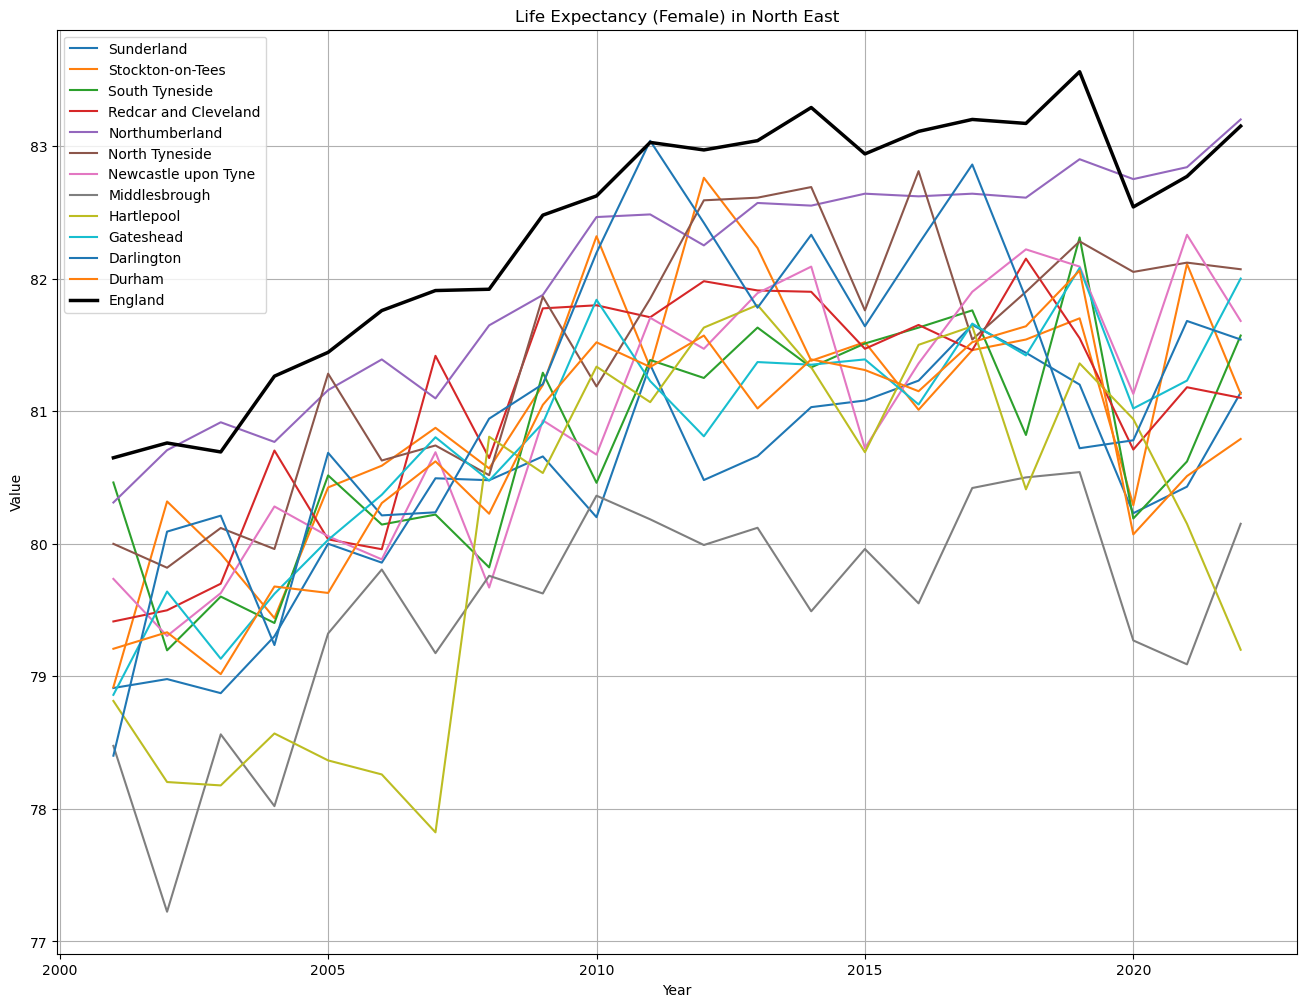

In [13]:
### Noth East

## Durham
life_expectancy_durham_F = pd.read_csv('life_expectancy_County Durham_Female.csv')
life_expectancy_durham_M = pd.read_csv('life_expectancy_County Durham_Male.csv')


# Darlington
life_expectancy_Darlington_F = pd.read_csv('life_expectancy_Darlington_Female.csv')
life_expectancy_Darlington_M = pd.read_csv('life_expectancy_Darlington_Male.csv')

# Gateshead
life_expectancy_Gateshead_F = pd.read_csv('life_expectancy_Gateshead_Female.csv')
life_expectancy_Gateshead_M = pd.read_csv('life_expectancy_Gateshead_Male.csv')

# Hartlepool
life_expectancy_Hartlepool_F = pd.read_csv('life_expectancy_Hartlepool_Female.csv')
life_expectancy_Hartlepool_M = pd.read_csv('life_expectancy_Hartlepool_Male.csv')

# Middlesbrough
life_expectancy_Middlesbrough_F = pd.read_csv('life_expectancy_Middlesbrough_Female.csv')
life_expectancy_Middlesbrough_M = pd.read_csv('life_expectancy_Middlesbrough_Male.csv')

# Newcastle upon Tyne 
life_expectancy_Newcastle_upon_Tyne_F = pd.read_csv('life_expectancy_Newcastle upon Tyne_Female.csv')
life_expectancy_Newcastle_upon_Tyne_M = pd.read_csv('life_expectancy_Newcastle upon Tyne_Male.csv')

# North Tyneside
life_expectancy_North_Tyneside_F = pd.read_csv('life_expectancy_North Tyneside_Female.csv')
life_expectancy_North_Tyneside_M = pd.read_csv('life_expectancy_North Tyneside_Male.csv')

# Northumberland
life_expectancy_Northumberland_F = pd.read_csv('life_expectancy_Northumberland_Female.csv')
life_expectancy_Northumberland_M = pd.read_csv('life_expectancy_Northumberland_Male.csv')

# Redcar and Cleveland
life_expectancy_Redcar_Cleveland_F = pd.read_csv('life_expectancy_Redcar and Cleveland_Female.csv')
life_expectancy_Redcar_Cleveland_M = pd.read_csv('life_expectancy_Redcar and Cleveland_Male.csv')

# South Tyneside
life_expectancy_South_Tyneside_F = pd.read_csv('life_expectancy_South Tyneside_Female.csv')
life_expectancy_South_Tyneside_M = pd.read_csv('life_expectancy_South Tyneside_Male.csv')

# Stockton-on-Tees 
life_expectancy_Stockton_on_Tees_F = pd.read_csv('life_expectancy_Stockton-on-Tees_Female.csv')
life_expectancy_Stockton_on_Tees_M = pd.read_csv('life_expectancy_Stockton-on-Tees_Male.csv')

# Sunderland
life_expectancy_Sunderland_F = pd.read_csv('life_expectancy_Sunderland_Female.csv')
life_expectancy_Sunderland_M = pd.read_csv('life_expectancy_Sunderland_Male.csv')




NE = [life_expectancy_Sunderland_M, life_expectancy_Stockton_on_Tees_M, life_expectancy_South_Tyneside_M,
     life_expectancy_Redcar_Cleveland_M, life_expectancy_Northumberland_M, life_expectancy_North_Tyneside_M, 
     life_expectancy_Newcastle_upon_Tyne_M, life_expectancy_Middlesbrough_M, life_expectancy_Hartlepool_M,
     life_expectancy_Gateshead_M, life_expectancy_Darlington_M,
      life_expectancy_durham_M, life_expectancy_england_M]

NElabels = ["Sunderland", "Stockton-on-Tees", "South Tyneside", "Redcar and Cleveland", "Northumberland", "North Tyneside", 
            "Newcastle upon Tyne","Middlesbrough","Hartlepool","Gateshead","Darlington", "Durham", "England"]


plt.figure(figsize=(16, 12))    
for i, df in enumerate(NE):
    if NElabels[i] == "England":
        plt.plot(df["Time period Sortable"], df["Value"], label=NElabels[i], color="black")
    else:
        plt.plot(df["Time period Sortable"], df["Value"], label=NElabels[i])


plt.title("Life Expectancy (Male) in North East")
plt.xlabel("Year")
plt.ylabel("Life Expectancy (Years)")
plt.legend(loc="best")
plt.grid(True)
plt.show()



plt.figure(figsize=(16, 12))
NE2 = [life_expectancy_Sunderland_F, life_expectancy_Stockton_on_Tees_F, life_expectancy_South_Tyneside_F,
     life_expectancy_Redcar_Cleveland_F, life_expectancy_Northumberland_F, life_expectancy_North_Tyneside_F, 
     life_expectancy_Newcastle_upon_Tyne_F, life_expectancy_Middlesbrough_F, life_expectancy_Hartlepool_F,
     life_expectancy_Gateshead_F, life_expectancy_Darlington_F,
      life_expectancy_durham_F, life_expectancy_england_F]

NElabels2 = ["Sunderland", "Stockton-on-Tees", "South Tyneside", "Redcar and Cleveland", "Northumberland", "North Tyneside", 
            "Newcastle upon Tyne","Middlesbrough","Hartlepool","Gateshead","Darlington", "Durham", "England"]


for i, df in enumerate(NE2):
    if NElabels2[i] == "England":
        plt.plot(df["Time period Sortable"], df["Value"], label=NElabels2[i], color="black", linewidth=2.5)
    else:
        plt.plot(df["Time period Sortable"], df["Value"], label=NElabels2[i])


plt.title("Life Expectancy (Female) in North East")
plt.xlabel("Year")
plt.ylabel("Value")
plt.legend()  
plt.grid(True)
plt.show()

In [14]:
life_expectancy = pd.read_csv ("life_expectancy.csv")
life_expectancy = life_expectancy.drop (life_expectancy.columns[[0,1,2,3,4,6,9,10,11,15,16,17,18,19,20,21,22,24,25,26]],axis = 1)
life_expectancy ['Time period Sortable'] = pd.to_datetime(life_expectancy['Time period Sortable'].astype(str).str[:4],format='%Y').dt.year

## I need yearly data so from line 9346 in csv --> -2 for indext plus counting from 0
life_expectancy = life_expectancy[9344:]

## separeting each gender and place 

## gender
life_expectancy_M = life_expectancy[life_expectancy["Sex"]== "Male"]
life_expectancy_F = life_expectancy[life_expectancy["Sex"]== "Female"]

## Deprivation
deprivation_2015 = pd.read_csv('2015.csv')
deprivation_2015 = deprivation_2015.rename(columns={"Local Authority District name (2013)": "Area Name"})

deprivation_2015.iloc[:, 4:] = deprivation_2015.iloc[:, 4:].replace(',', '', regex=True)
# deprivation_2015.iloc[:, 4:] = deprivation_2015.iloc[:, 4:].astype(int) does not work 
deprivation_2015["Index of Multiple Deprivation (IMD) Rank (where 1 is most deprived)"]= deprivation_2015["Index of Multiple Deprivation (IMD) Rank (where 1 is most deprived)"].astype(int)
deprivation_2015["Income Rank (where 1 is most deprived)"] = deprivation_2015["Income Rank (where 1 is most deprived)"].astype(int)
deprivation_2015["Employment Rank (where 1 is most deprived)"] = deprivation_2015["Employment Rank (where 1 is most deprived)"].astype(int)
deprivation_2015["Education, Skills and Training Rank (where 1 is most deprived)"] = deprivation_2015["Education, Skills and Training Rank (where 1 is most deprived)"].astype(int)
deprivation_2015["Health Deprivation and Disability Rank (where 1 is most deprived)"] = deprivation_2015["Health Deprivation and Disability Rank (where 1 is most deprived)"].astype(int)
deprivation_2015["Crime Rank (where 1 is most deprived)"] = deprivation_2015["Crime Rank (where 1 is most deprived)"].astype(int)
deprivation_2015["Barriers to Housing and Services Rank (where 1 is most deprived)"] = deprivation_2015["Barriers to Housing and Services Rank (where 1 is most deprived)"].astype(int)
deprivation_2015["Living Environment Rank (where 1 is most deprived)"] = deprivation_2015["Living Environment Rank (where 1 is most deprived)"].astype(int)


deprivation_2015_mean = deprivation_2015.iloc[:, 4::2].groupby(deprivation_2015['Area Name']).mean().reset_index()
deprivation_2015_mean['Time period Sortable'] = pd.to_datetime('2015',format='%Y')
deprivation_2015_mean ['Time period Sortable'] = pd.to_datetime(deprivation_2015_mean['Time period Sortable'].astype(str).str[:4],format='%Y').dt.year



## 2019
deprivation_2019 = pd.read_csv ('deprivation_2019.csv')
deprivation_2019 = deprivation_2019.rename(columns={"Local Authority District name (2019)": "Area Name"})

deprivation_2019.iloc[:, 4:] = deprivation_2019.iloc[:, 4:].replace(',', '', regex=True)
# deprivation_2019.iloc[:, 4:] = deprivation_2019.iloc[:, 4:].astype(int) 

deprivation_2019["Index of Multiple Deprivation (IMD) Rank (where 1 is most deprived)"]= deprivation_2019["Index of Multiple Deprivation (IMD) Rank (where 1 is most deprived)"].astype(int)
deprivation_2019["Income Rank (where 1 is most deprived)"] = deprivation_2019["Income Rank (where 1 is most deprived)"].astype(int)
deprivation_2019["Employment Rank (where 1 is most deprived)"] = deprivation_2019["Employment Rank (where 1 is most deprived)"].astype(int)
deprivation_2019["Education, Skills and Training Rank (where 1 is most deprived)"] = deprivation_2019["Education, Skills and Training Rank (where 1 is most deprived)"].astype(int)
deprivation_2019["Health Deprivation and Disability Rank (where 1 is most deprived)"] = deprivation_2019["Health Deprivation and Disability Rank (where 1 is most deprived)"].astype(int)
deprivation_2019["Crime Rank (where 1 is most deprived)"] = deprivation_2019["Crime Rank (where 1 is most deprived)"].astype(int)
deprivation_2019["Barriers to Housing and Services Rank (where 1 is most deprived)"] = deprivation_2019["Barriers to Housing and Services Rank (where 1 is most deprived)"].astype(int)
deprivation_2019["Living Environment Rank (where 1 is most deprived)"] = deprivation_2019["Living Environment Rank (where 1 is most deprived)"].astype(int)

deprivation_2019_mean = deprivation_2019.iloc[:, 4::2].groupby(deprivation_2019['Area Name']).mean().reset_index()
deprivation_2019_mean['Time period Sortable'] = pd.to_datetime('2019',format='%Y')
deprivation_2019_mean ['Time period Sortable'] = pd.to_datetime(deprivation_2019_mean['Time period Sortable'].astype(str).str[:4],format='%Y').dt.year

deprivation_all = pd.concat([deprivation_2015_mean, deprivation_2019_mean], ignore_index=True)


## Respiraotry
respiratory = pd.read_csv ('Respiratorary.csv')
respiratory['Time period Sortable'] = pd.to_datetime(respiratory['Time period Sortable'].astype(str).str[:4],format='%Y').dt.year
respiratory = respiratory.rename(columns={"Value": "Respiratory Value"})
respiratory = respiratory[['Area Name', 'Sex', 'Respiratory Value', 'Time period Sortable']]


## smoking
smoking = pd.read_csv ("Smoking.csv")
smoking['Time period Sortable'] = pd.to_datetime(smoking['Time period Sortable'].astype(str).str[:4],format='%Y').dt.year
smoking = smoking.rename(columns={'Value': 'Smoking Value'})
smoking = smoking[['Area Name', 'Sex', 'Smoking Value', 'Time period Sortable']]

## 
df_2015_2019 = pd.merge(life_expectancy, deprivation_all, on=('Area Name','Time period Sortable'), how='inner')
df_2015_2019 = pd.merge(df_2015_2019, respiratory, on=('Area Name','Sex', 'Time period Sortable'), how='inner')
##  to get district data 
df_2015_2019 = df_2015_2019[1::2]

df_2015_2019 = pd.merge(df_2015_2019, smoking, on=('Area Name','Sex', 'Time period Sortable'), how='inner')

/var/folders/gq/7_q_4gnd3v1bmhxl11ms9k640000gn/T/ipykernel_99097/3109617720.py:60: DtypeWarning: Columns (11,20) have mixed types. Specify dtype option on import or set low_memory=False.
  respiratory = pd.read_csv ('Respiratorary.csv')
/var/folders/gq/7_q_4gnd3v1bmhxl11ms9k640000gn/T/ipykernel_99097/3109617720.py:67: DtypeWarning: Columns (11,20) have mixed types. Specify dtype option on import or set low_memory=False.
  smoking = pd.read_csv ("Smoking.csv")


In [15]:
specific_district = ["Sunderland", "Stockton-on-Tees", "South Tyneside", "Redcar and Cleveland", "Northumberland", "North Tyneside",
                     "Newcastle upon Tyne","Middlesbrough","Hartlepool","Gateshead","Darlington", "County Durham",
                    "Wigan","Trafford","Tameside","Stockport","Salford","Rochdale","Oldham", "Manchester","Bury","Bolton",
                    "York", "Wakefield","Sheffield","Rotherham","North Yorkshire","Leeds","Kirklees","Kingston upon Hull, City of",
                     "East Riding of Yorkshire","Doncaster","Calderdale","Bradford","Barnsley",
                    "Wolverhampton","Wolverhampton","Walsall","Solihull","Dudley","Coventry","Birmingham",
                    "West Northamptonshire","North Northamptonshire","Rutland","Leicestershire","Leicester",
                     "North Lincolnshire","North East Lincolnshire","Lincolnshire","Derby","Nottingham"]

industrial_district = df_2015_2019[df_2015_2019['Area Name'].isin(specific_district)]
len(specific_district)


industrial_district_M = industrial_district[industrial_district['Sex'] == 'Male']
industrial_district_F = industrial_district[industrial_district['Sex'] == 'Female']

In [16]:
## Outlier check

from scipy.stats import zscore

industrial_district_M['z_score_life'] = zscore(industrial_district_M['Value'])
outliers_M = industrial_district_M[abs(industrial_district_M['z_score_life']) > 3]
print (outliers_M)

industrial_district_F['z_score_life'] = zscore(industrial_district_F['Value'])
outliers_F = industrial_district_F[abs(industrial_district_F['z_score_life']) > 3]
print(outliers_F)

industrial_district_M = industrial_district_M.drop(index=266)
industrial_district_F = industrial_district_F.drop(index=267)

    Area Name   Sex       Age  Value  Lower CI 95.0 limit  \
266   Rutland  Male  All ages  83.93                82.31   

     Upper CI 95.0 limit  Time period Sortable  \
266                85.55                  2019   

     Index of Multiple Deprivation (IMD) Rank (where 1 is most deprived)  \
266                                       26156.869565                     

     Income Rank (where 1 is most deprived)  \
266                            25181.391304   

     Employment Rank (where 1 is most deprived)  \
266                                25306.826087   

     Education, Skills and Training Rank (where 1 is most deprived)  \
266                                       24989.043478                

     Health Deprivation and Disability Rank (where 1 is most deprived)  \
266                                       28420.478261                   

     Crime Rank (where 1 is most deprived)  \
266                           29057.608696   

     Barriers to Housing and Services Ra

/var/folders/gq/7_q_4gnd3v1bmhxl11ms9k640000gn/T/ipykernel_99097/1755072573.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  industrial_district_M['z_score_life'] = zscore(industrial_district_M['Value'])
/var/folders/gq/7_q_4gnd3v1bmhxl11ms9k640000gn/T/ipykernel_99097/1755072573.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  industrial_district_F['z_score_life'] = zscore(industrial_district_F['Value'])


# Random Forest
## Males

Out-of-Bag Score: 0.7447127906475124
Mean Squared Error: 0.046708109883845196
R-squared: 0.9649488196890305
Cross-Validation Scores: [0.8193427  0.65264729 0.71371433 0.57040451 0.50871371]
Mean CV R^2: 0.6529645095692056


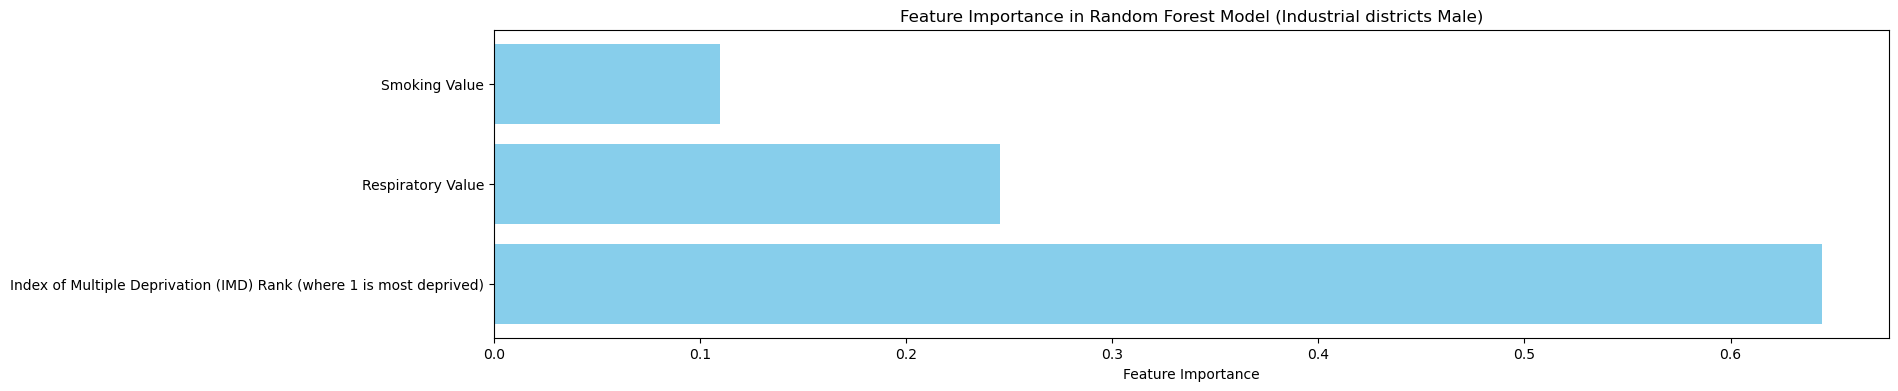

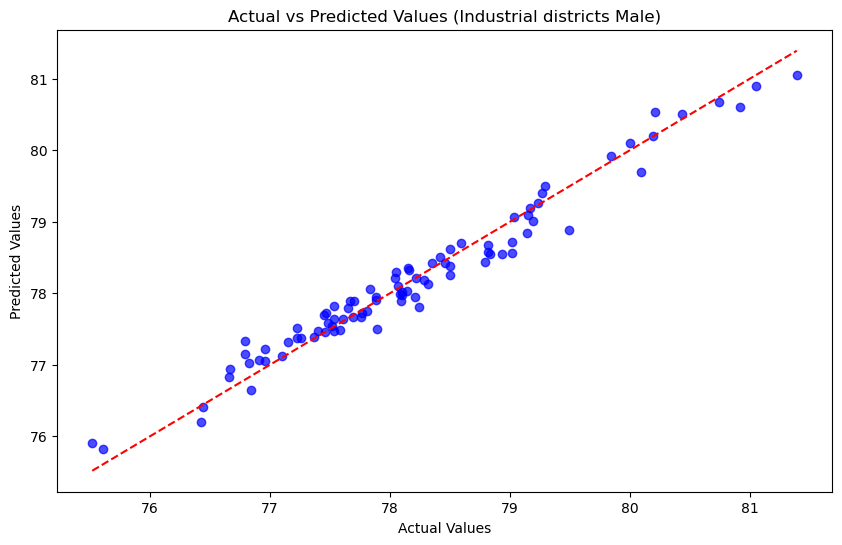

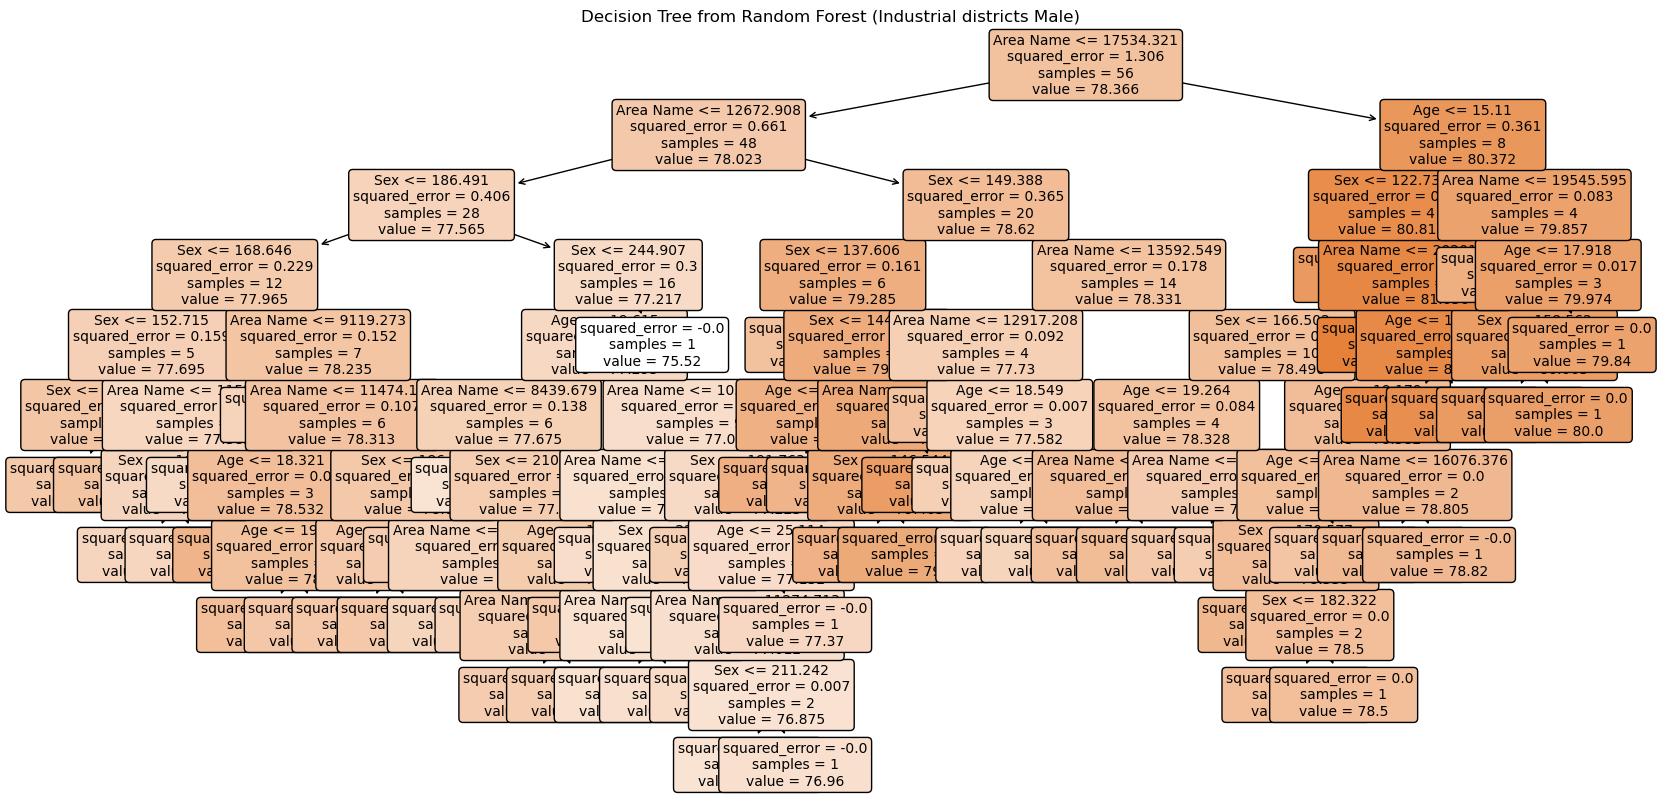

In [18]:
import warnings

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

warnings.filterwarnings('ignore')

y = industrial_district_M['Value']
X = industrial_district_M[['Index of Multiple Deprivation (IMD) Rank (where 1 is most deprived)','Respiratory Value',
                          'Smoking Value']]


regressor = RandomForestRegressor(n_estimators=200, random_state=45, oob_score=True,
                                 max_depth=10)


regressor.fit(X, y)

from sklearn.metrics import mean_squared_error, r2_score


oob_score = regressor.oob_score_
print(f'Out-of-Bag Score: {oob_score}')


predictions = regressor.predict(X)


mse = mean_squared_error(y, predictions)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y, predictions)
print(f'R-squared: {r2}')


cv_scores = cross_val_score(regressor, X, y, cv=5, scoring='r2')
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV R^2: {cv_scores.mean()}")

feature_importance = regressor.feature_importances_
plt.figure(figsize=(18, 4))
plt.barh(X.columns, feature_importance, color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Random Forest Model (Industrial districts Male)')
plt.show()

predictions = regressor.predict(X)


plt.figure(figsize=(10, 6))
plt.scatter(y, predictions, color='blue', alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')  
plt.title("Actual vs Predicted Values (Industrial districts Male)")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

tree_to_plot = regressor.estimators_[0]


plt.figure(figsize=(20, 10))
plot_tree(tree_to_plot, feature_names=industrial_district_M.columns.tolist(), filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree from Random Forest (Industrial districts Male)")
plt.show()


# Multiple linear regression 
## Males

Industrial area (Male)(2015 & 2019)
                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     95.00
Date:                Sun, 15 Dec 2024   Prob (F-statistic):           4.65e-27
Time:                        14:08:52   Log-Likelihood:                -73.609
No. Observations:                  89   AIC:                             155.2
Df Residuals:                      85   BIC:                             165.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                                                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

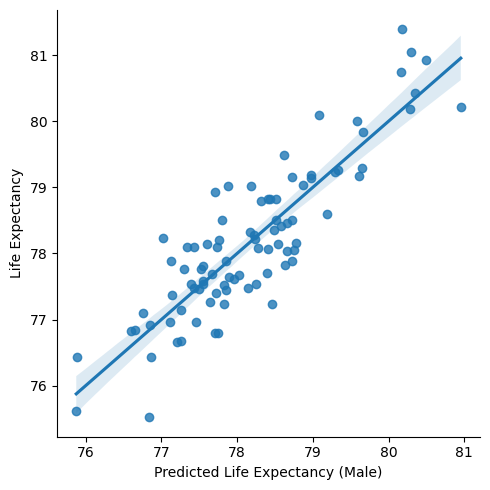

In [20]:

Y = industrial_district_M['Value']
X = industrial_district_M[['Respiratory Value', 'Index of Multiple Deprivation (IMD) Rank (where 1 is most deprived)',
                                   'Smoking Value']]


from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

scaler = StandardScaler()
X_standardized = pd.DataFrame(scaler.fit_transform(X), columns=X.columns, index=X.index)
X_standardized = sm.add_constant(X_standardized)


model = sm.OLS(Y, X_standardized)
result = model.fit()

print("Industrial area (Male)(2015 & 2019)")
print(result.summary())

model_v_actual = pd.concat([Y, result.fittedvalues], axis=1).set_axis(['Life Expectancy', 'Predicted Life Expectancy (Male)'], axis=1)

sns.lmplot(data=model_v_actual, x='Predicted Life Expectancy (Male)', y='Life Expectancy')

y_true = industrial_district_M['Value']
y_predicted = result.fittedvalues
mse = mean_squared_error(y_true, y_predicted)
rmse = np.sqrt(mse)

print ()
print("Mean Squared Error is: ", mse)
print("Root Mean Squared Error is : ", rmse)




# Random Forest 
## Females

Out-of-Bag Score: 0.7505247961027397
Mean Squared Error: 0.034383737799185396
R-squared: 0.9666135718379623
Cross-Validation Scores: [0.79128386 0.76941157 0.75508469 0.57697454 0.55229988]
Mean CV R^2: 0.689010908895054


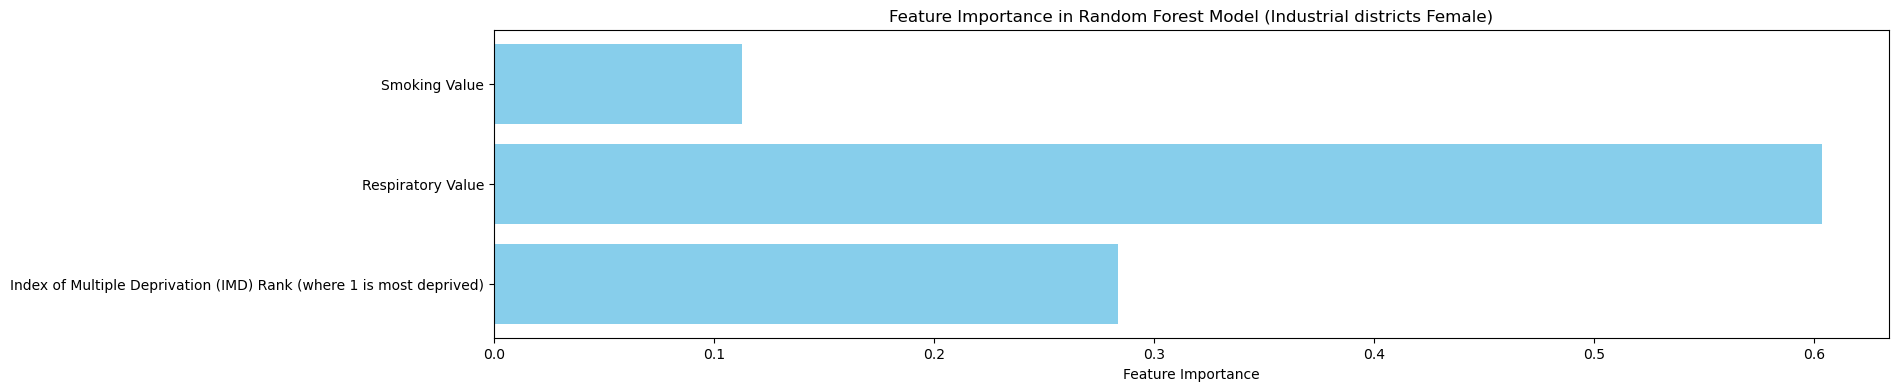

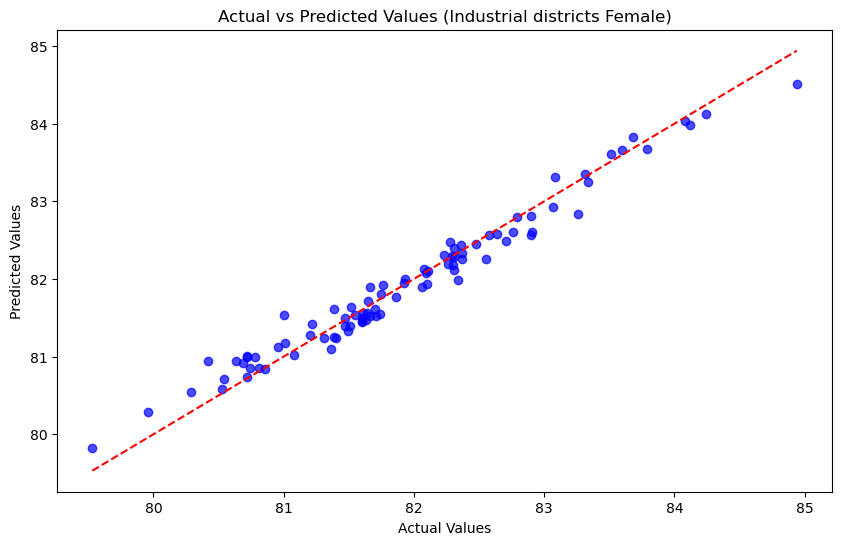

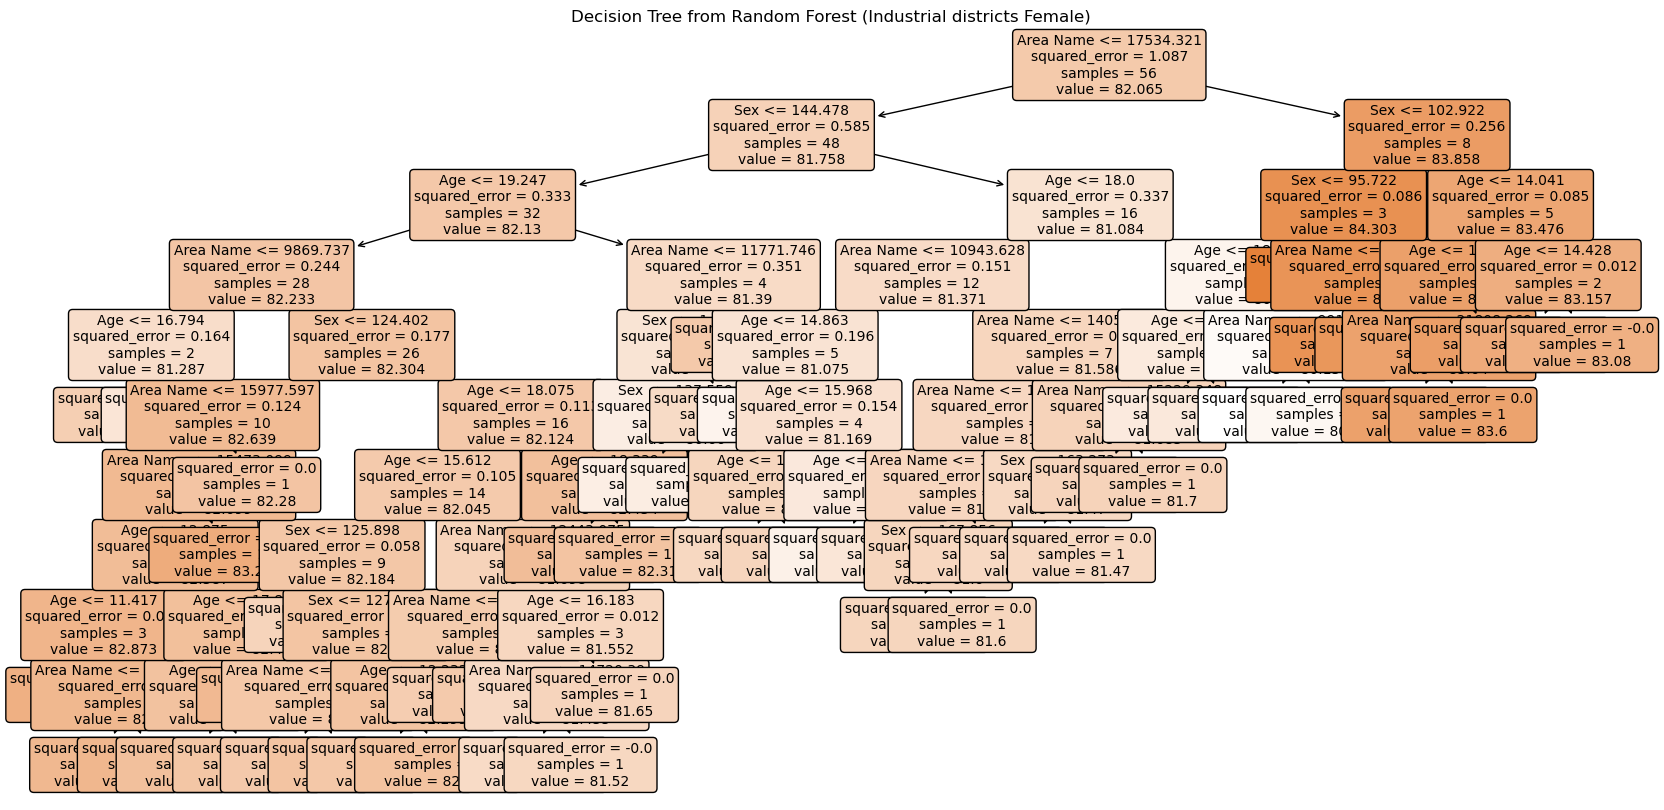

In [22]:
warnings.filterwarnings('ignore')

y = industrial_district_F['Value']
X = industrial_district_F[['Index of Multiple Deprivation (IMD) Rank (where 1 is most deprived)','Respiratory Value',
                          'Smoking Value']]


regressor = RandomForestRegressor(n_estimators=200, random_state=45, oob_score=True,
                                 max_depth=10)


regressor.fit(X, y)



oob_score = regressor.oob_score_
print(f'Out-of-Bag Score: {oob_score}')


predictions = regressor.predict(X)


mse = mean_squared_error(y, predictions)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y, predictions)
print(f'R-squared: {r2}')


cv_scores = cross_val_score(regressor, X, y, cv=5, scoring='r2')
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV R^2: {cv_scores.mean()}")

feature_importance = regressor.feature_importances_
plt.figure(figsize=(18, 4))
plt.barh(X.columns, feature_importance, color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Random Forest Model (Industrial districts Female)')
plt.show()

predictions = regressor.predict(X)


plt.figure(figsize=(10, 6))
plt.scatter(y, predictions, color='blue', alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')  
plt.title("Actual vs Predicted Values (Industrial districts Female)")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()


tree_to_plot = regressor.estimators_[0]


plt.figure(figsize=(20, 10))
plot_tree(tree_to_plot, feature_names=industrial_district_F.columns.tolist(), filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree from Random Forest (Industrial districts Female)")
plt.show()



# Multiple linear regression 
## Females

Industrial area (Female)(2015 & 2019)

                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     108.5
Date:                Sun, 15 Dec 2024   Prob (F-statistic):           5.72e-29
Time:                        14:08:57   Log-Likelihood:                -57.523
No. Observations:                  89   AIC:                             123.0
Df Residuals:                      85   BIC:                             133.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                                                          coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

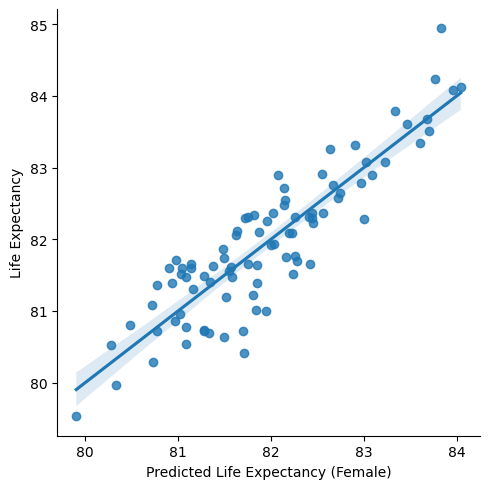

In [24]:
Y = industrial_district_F['Value']
X = industrial_district_F[['Respiratory Value', 'Index of Multiple Deprivation (IMD) Rank (where 1 is most deprived)',
                  'Smoking Value']]

scaler = StandardScaler()
X_standardized = pd.DataFrame(scaler.fit_transform(X), columns=X.columns, index=X.index)
X_standardized = sm.add_constant(X_standardized)


model = sm.OLS(Y, X_standardized)
result = model.fit()
print("Industrial area (Female)(2015 & 2019)")
print ()
print (result.summary())

model_v_actual = pd.concat([industrial_district_F['Value'],result.fittedvalues],axis=1).set_axis(['Life Expectancy',
                                                                                                  'Predicted Life Expectancy (Female)'],axis=1)
sns.lmplot(data=model_v_actual,x='Predicted Life Expectancy (Female)',y='Life Expectancy')


y_true = industrial_district_F['Value']
y_predicted = result.fittedvalues
mse = mean_squared_error(y_true, y_predicted)
rmse = np.sqrt(mse)

print ()
print("Mean Squared Error is: ", mse)
print("Root Mean Squared Error is : ", rmse)


# Non-industrial districts

In [26]:
df_2015_2019_M = df_2015_2019[df_2015_2019["Sex"]== "Male"]
better_M = df_2015_2019_M.sort_values(by=['Index of Multiple Deprivation (IMD) Rank (where 1 is most deprived)', 'Respiratory Value',
                                      'Smoking Value'], ascending=[False,True, True])
## make it same size as industrial

better_M = better_M[0:90]
print ('For men oppsite condion places are :')
print (set(list(better_M['Area Name'])))
print ()
print ()

df_2015_2019_F = df_2015_2019[df_2015_2019["Sex"]== "Female"]
better_F = df_2015_2019_F.sort_values(by=['Respiratory Value','Index of Multiple Deprivation (IMD) Rank (where 1 is most deprived)',
                                      'Smoking Value'], ascending=[True, False, True])
## make it same size as industrial

better_F = better_F[0:90]
print ('For Women oppsite condion places are :')
print (set(list(better_F['Area Name'])))

better_M['z_score_life'] = zscore(better_M['Value'])
outliers_M = better_M[abs(better_M['z_score_life']) > 3]
print (outliers_M)

better_F['z_score_life'] = zscore(better_F['Value'])
outliers_F = better_F[abs(better_F['z_score_life']) > 3]
print (outliers_F)

# there is not any outlier for better datasets

For men oppsite condion places are :
{'Southend-on-Sea', 'Reading', 'Sutton', 'Wandsworth', 'Wiltshire', 'East Riding of Yorkshire', 'Swindon', 'Cheshire East', 'Bath and North East Somerset', 'Central Bedfordshire', 'Bournemouth, Christchurch and Poole', 'Warrington', 'Camden', 'Richmond upon Thames', 'Stockton-on-Tees', 'Hillingdon', 'Milton Keynes', 'Merton', 'Dorset', 'Redbridge', 'Kingston upon Thames', 'Rutland', 'Bedford', 'Medway', 'Wokingham', 'Barnet', 'North Tyneside', 'Bury', 'Westminster', 'Shropshire', 'Stockport', 'Solihull', 'Trafford', 'South Gloucestershire', 'Bracknell Forest', 'Brighton and Hove', 'Harrow', 'Bromley', 'Bexley', 'Dudley', 'Windsor and Maidenhead', 'Kensington and Chelsea', 'West Berkshire', 'Thurrock', 'Havering', 'Cheshire West and Chester', 'North Somerset', 'Northumberland', 'York', 'North Lincolnshire'}


For Women oppsite condion places are :
{'Cornwall', 'Sheffield', 'Sutton', 'Wandsworth', 'Wolverhampton', 'Wiltshire', 'East Riding of Yorkshir

## Males

Non industrial Male

Out-of-Bag Score: 0.6269372408181533
Mean Squared Error: 0.07338420436846482
R-squared: 0.9497092935988155
Cross-Validation Scores: [-0.13871334 -0.6235358   0.68950001  0.2490593   0.49647553]
Mean CV R^2: 0.13455714057479257


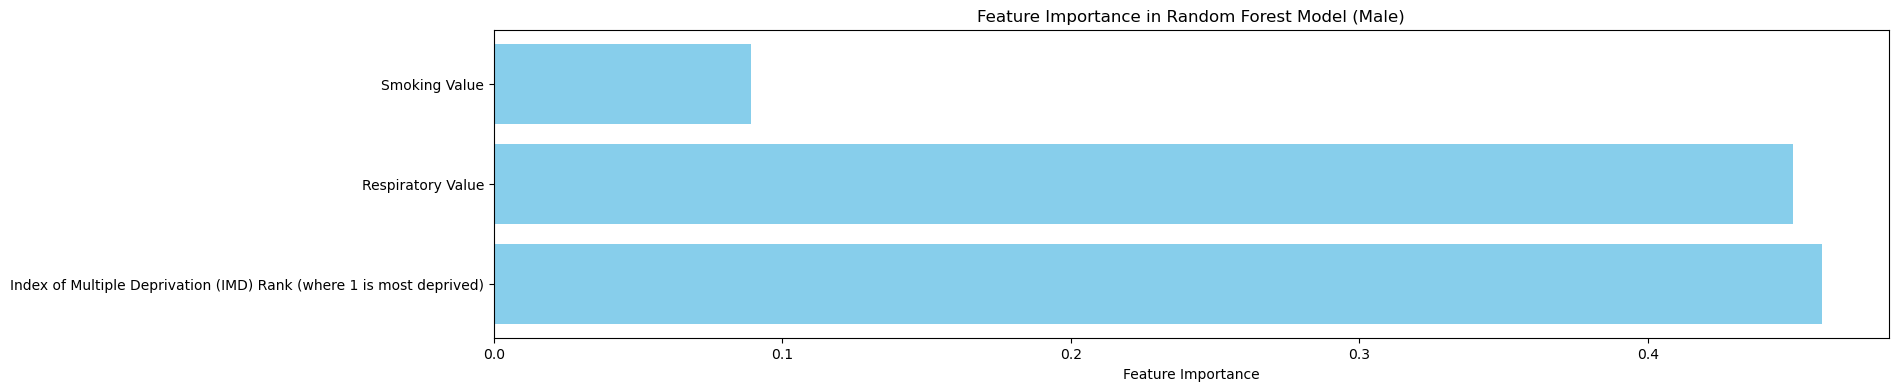

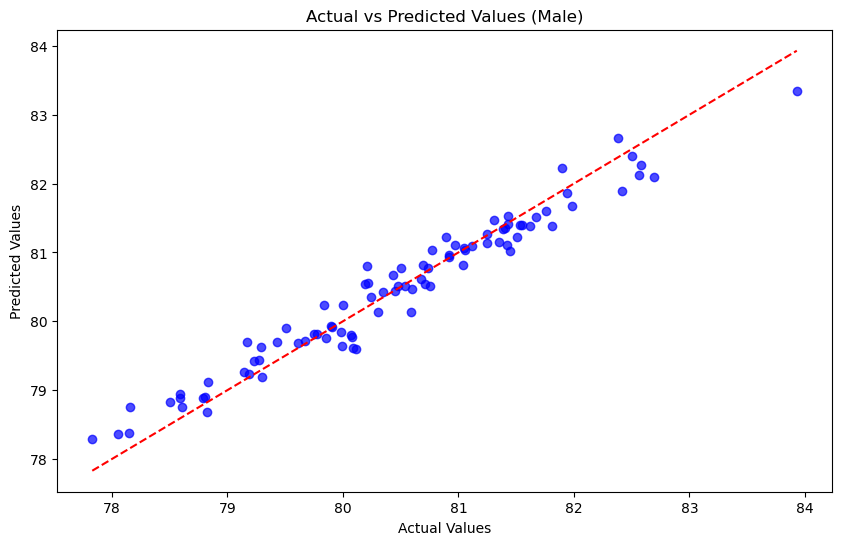

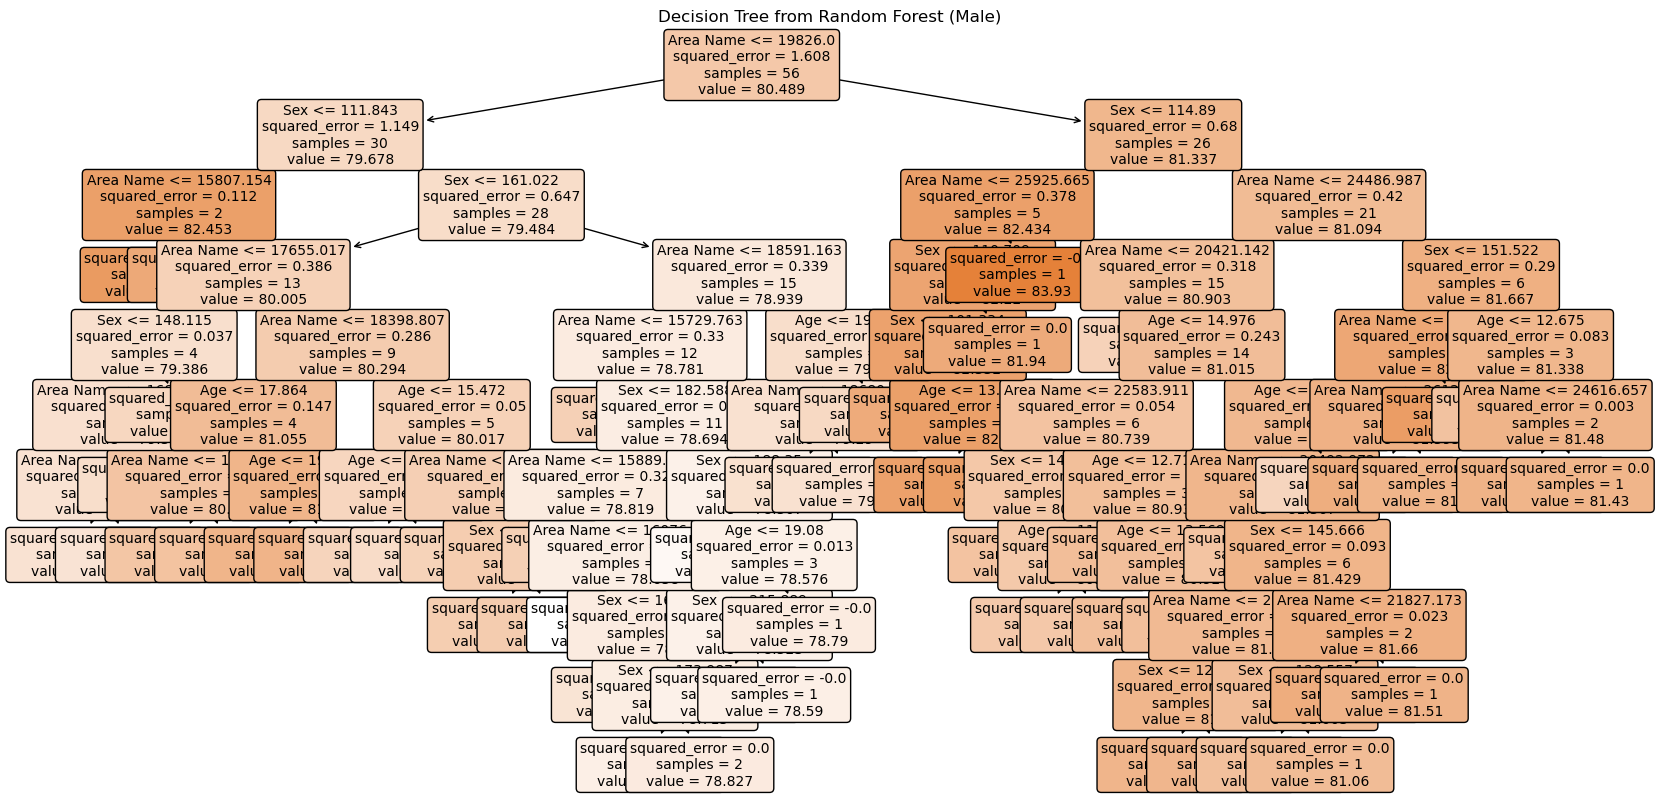

In [28]:
warnings.filterwarnings('ignore')

y = better_M['Value']
X = better_M[['Index of Multiple Deprivation (IMD) Rank (where 1 is most deprived)','Respiratory Value',
                          'Smoking Value']]


regressor = RandomForestRegressor(n_estimators=200, random_state=45, oob_score=True,
                                 max_depth=10)


regressor.fit(X, y)


print ('Non industrial Male')
print ()

oob_score = regressor.oob_score_
print("Out-of-Bag Score:", oob_score)


predictions = regressor.predict(X)

mse = mean_squared_error(y, predictions)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y, predictions)
print(f'R-squared: {r2}')

cv_scores = cross_val_score(regressor, X, y, cv=5, scoring='r2')
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV R^2: {cv_scores.mean()}")

feature_importance = regressor.feature_importances_
plt.figure(figsize=(18, 4))
plt.barh(X.columns, feature_importance, color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Random Forest Model (Male)')
plt.show()

predictions = regressor.predict(X)


plt.figure(figsize=(10, 6))
plt.scatter(y, predictions, color='blue', alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')  
plt.title("Actual vs Predicted Values (Male)")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

tree_to_plot = regressor.estimators_[0]


plt.figure(figsize=(20, 10))
plot_tree(tree_to_plot, feature_names=better_M.columns.tolist(), filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree from Random Forest (Male)")
plt.show()


Opposite condition (Male)

                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     55.03
Date:                Sun, 15 Dec 2024   Prob (F-statistic):           5.97e-20
Time:                        14:09:02   Log-Likelihood:                -96.496
No. Observations:                  90   AIC:                             201.0
Df Residuals:                      86   BIC:                             211.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                                                          coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------

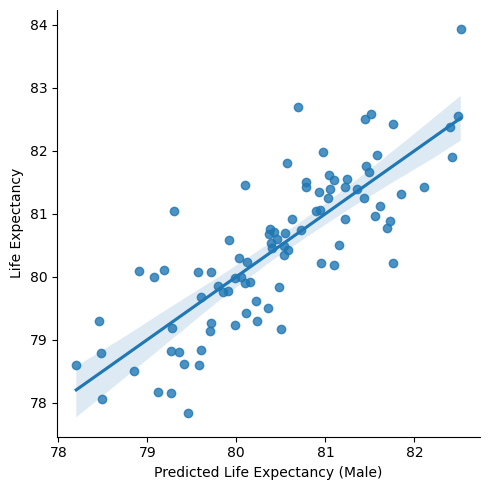

In [29]:
Y = better_M['Value']
X = better_M[['Respiratory Value', 'Index of Multiple Deprivation (IMD) Rank (where 1 is most deprived)',
                  'Smoking Value']]
scaler = StandardScaler()
X_standardized = pd.DataFrame(scaler.fit_transform(X), columns=X.columns, index=X.index)
X_standardized = sm.add_constant(X_standardized)
model = sm.OLS(Y, X_standardized)

result = model.fit()
print("Opposite condition (Male)")
print ()
print (result.summary())

model_v_actual = pd.concat([better_M['Value'],result.fittedvalues],axis=1).set_axis(['Life Expectancy',
                                                                                     'Predicted Life Expectancy (Male)'],axis=1)
sns.lmplot(data=model_v_actual,x='Predicted Life Expectancy (Male)',y='Life Expectancy')



y_true = better_M['Value']
y_predicted = result.fittedvalues
mse = mean_squared_error(y_true, y_predicted)
rmse = np.sqrt(mse)

print ()
print("Mean Squared Error is: ", mse)
print("Root Mean Squared Error is : ", rmse)


## Females 

Non industrial females

Out-of-Bag Score: 0.3664956752564187
Mean Squared Error: 0.09267828304417833
R-squared: 0.9116129008011374
Cross-Validation Scores: [-0.15793501 -0.00343504  0.09572268 -0.38693487 -0.12444544]
Mean CV R^2: -0.1154055361367418


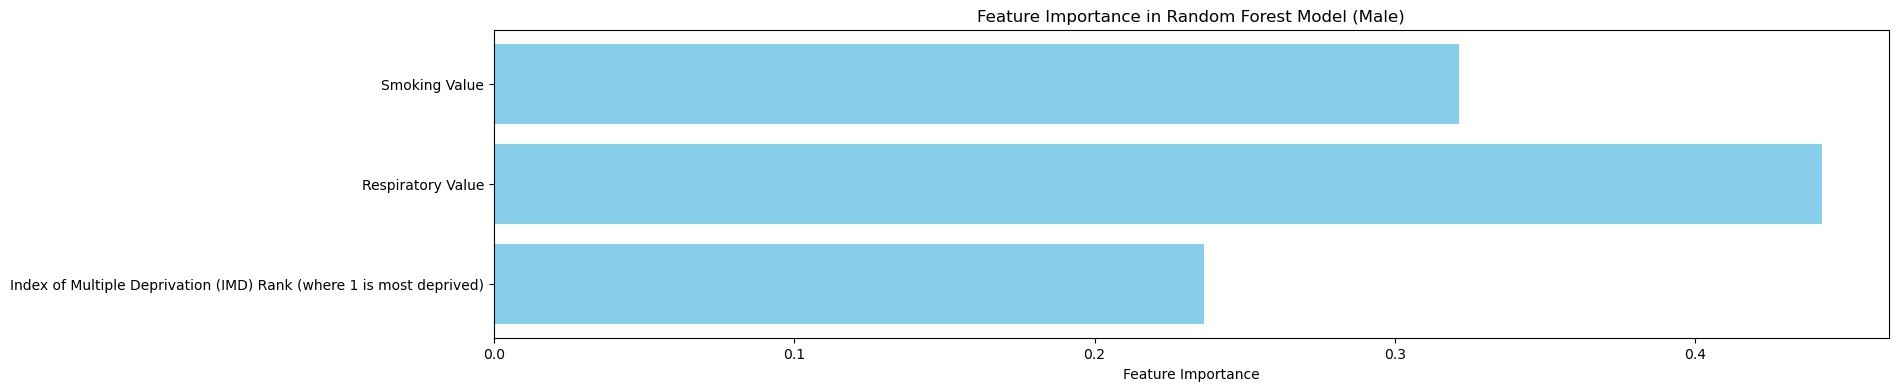

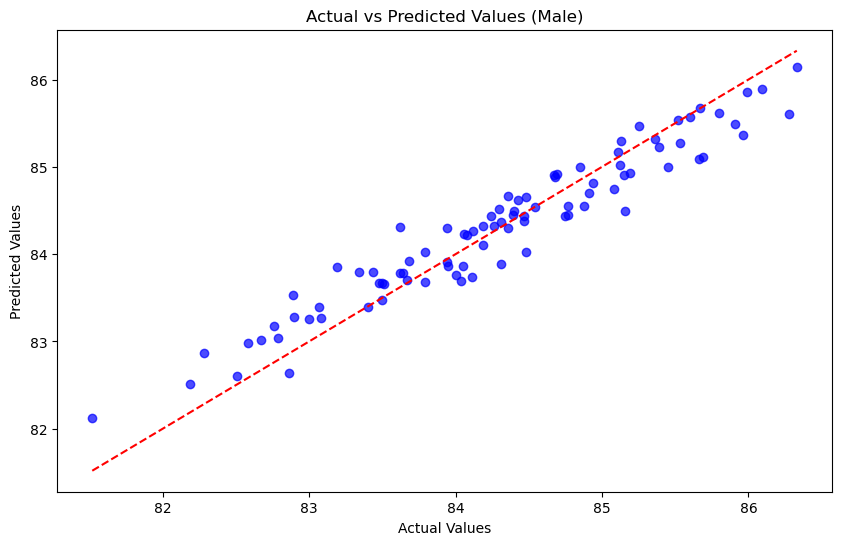

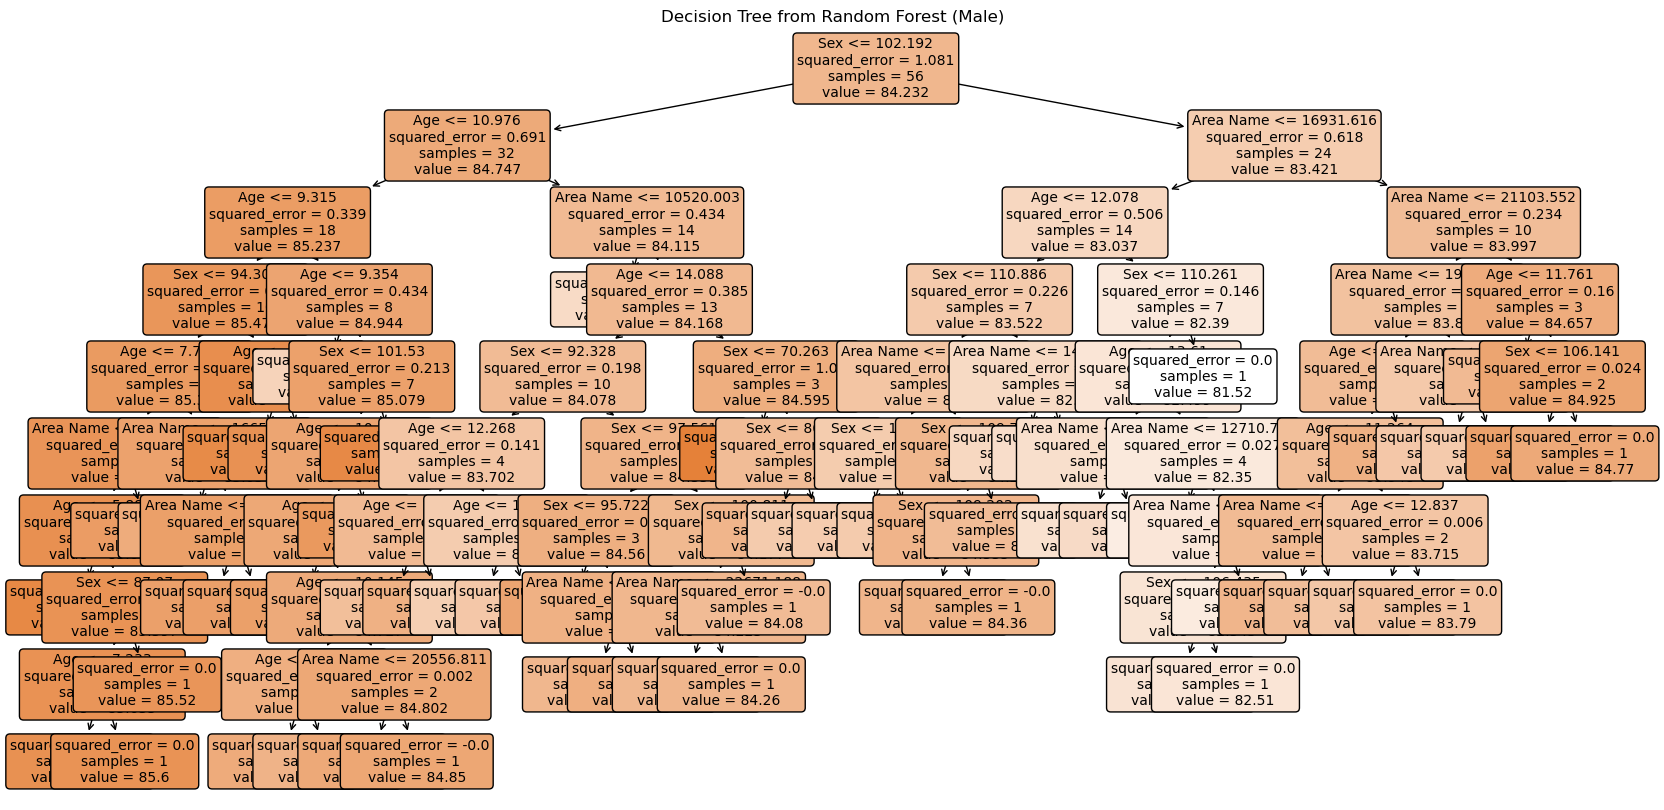

In [31]:
warnings.filterwarnings('ignore')

y = better_F['Value']
X = better_F[['Index of Multiple Deprivation (IMD) Rank (where 1 is most deprived)','Respiratory Value',
                          'Smoking Value']]


regressor = RandomForestRegressor(n_estimators=200, random_state=45, oob_score=True,
                                 max_depth=10)


regressor.fit(X, y)



print ('Non industrial females')
print ()
oob_score = regressor.oob_score_
print(f'Out-of-Bag Score: {oob_score}')


predictions = regressor.predict(X)


mse = mean_squared_error(y, predictions)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y, predictions)
print(f'R-squared: {r2}')

cv_scores = cross_val_score(regressor, X, y, cv=5, scoring='r2')
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV R^2: {cv_scores.mean()}")

feature_importance = regressor.feature_importances_
plt.figure(figsize=(18, 4))
plt.barh(X.columns, feature_importance, color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Random Forest Model (Male)')
plt.show()

predictions = regressor.predict(X)


plt.figure(figsize=(10, 6))
plt.scatter(y, predictions, color='blue', alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')  
plt.title("Actual vs Predicted Values (Male)")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

tree_to_plot = regressor.estimators_[0]


plt.figure(figsize=(20, 10))
plot_tree(tree_to_plot, feature_names=better_F.columns.tolist(), filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree from Random Forest (Male)")
plt.show()



Opposite condition (Female)

                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     35.87
Date:                Sun, 15 Dec 2024   Prob (F-statistic):           3.92e-15
Time:                        14:09:06   Log-Likelihood:                -93.317
No. Observations:                  90   AIC:                             194.6
Df Residuals:                      86   BIC:                             204.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                                                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------

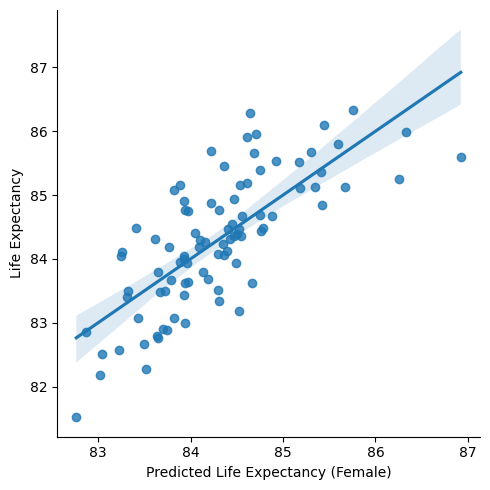

In [32]:
Y = better_F['Value']
X = better_F[['Respiratory Value', 'Index of Multiple Deprivation (IMD) Rank (where 1 is most deprived)',
                  'Smoking Value']]

scaler = StandardScaler()
X_standardized = pd.DataFrame(scaler.fit_transform(X), columns=X.columns, index=X.index)
X_standardized = sm.add_constant(X_standardized)


model = sm.OLS(Y, X_standardized)
result = model.fit()
print("Opposite condition (Female)")
print ()
print (result.summary())

model_v_actual = pd.concat([better_F['Value'],result.fittedvalues],axis=1).set_axis(['Life Expectancy',
                                                                                     'Predicted Life Expectancy (Female)'],axis=1)
sns.lmplot(data=model_v_actual,x='Predicted Life Expectancy (Female)',y='Life Expectancy')


y_true = better_F['Value']
y_predicted = result.fittedvalues
mse = mean_squared_error(y_true, y_predicted)
rmse = np.sqrt(mse)

print ()
print("Mean Squared Error is: ", mse)
print("Root Mean Squared Error is : ", rmse)


In [33]:
# Check which place is higher than england average 

print (print(life_expectancy[(life_expectancy["Area Name"] == "England") &(life_expectancy["Time period Sortable"] == 2019)]))
print (print(life_expectancy[(life_expectancy["Area Name"] == "England") &(life_expectancy["Time period Sortable"] == 2015)]))

higher_place_M = []
lower_place_M = []
for i, row in better_M.iterrows():
    if row["Value"] > 79.87:
    
        higher_place_M.append(row["Area Name"])
    elif row["Value"] > 79.36:
               higher_place_M.append(row["Area Name"])
    else:
        lower_place_M.append(row["Area Name"])

print ()
print ('Having higher life expectancy than England average places (Men) are')
print (set(higher_place_M))
print()
print ('Having lower life expectancy than England average places are')
print (set(lower_place_M))
print ()
print ()

higher_place_F = []
lower_place_F = []

for i, row in better_F.iterrows():
    if row["Value"] > 83.56:
        
        higher_place_M.append(row["Area Name"])
    elif row["Value"] > 82.94:
       
        higher_place_M.append(row["Area Name"])
    else:
        lower_place_M.append(row["Area Name"])


print ()
print ('Having higher life expectancy than England average places (Female) are')
print (set(higher_place_M))
print()
print ('Having lower life expectancy than England average places (Female) are')
print (set(lower_place_M))

      Area Name     Sex       Age  Value  Lower CI 95.0 limit  \
14800   England    Male  All ages  79.87                79.81   
14801   England  Female  All ages  83.56                83.51   
14802   England    Male  All ages  79.87                79.81   
14803   England  Female  All ages  83.56                83.51   

       Upper CI 95.0 limit  Time period Sortable  
14800                79.92                  2019  
14801                83.60                  2019  
14802                79.92                  2019  
14803                83.60                  2019  
None
      Area Name     Sex       Age  Value  Lower CI 95.0 limit  \
13580   England    Male  All ages  79.36                79.31   
13581   England  Female  All ages  82.94                82.90   
13582   England    Male  All ages  79.36                79.31   
13583   England  Female  All ages  82.94                82.90   

       Upper CI 95.0 limit  Time period Sortable  
13580                79.41           